<h1>Содержимое проекта<span class="tocSkip"></span></h1>

1  Цели и задачи проекта

2  Откройте файл с данными и изучите общую информацию.

3  Предобработка данных

    3.1  Найдите и изучите пропущенные значения в столбцах
    3.2  Рассмотрите типы данных в каждом столбце
    3.3  Изучите уникальные значения в столбце с названиями и устраните неявные дубликаты
    3.4  Посчитайте и добавьте в таблицу новые столбцы
    3.5  Найдите и устраните редкие и выбивающиеся значения
        3.5.1  "Редкие" (лишние) для нашей работы значения


4  Проведите исследовательский анализ данных

    4.1  Параметры объектов
    
        4.1.1  общая площадь
        4.1.2  жилая площадь
        4.1.3  площадь кухни
        4.1.4  цена объекта
        4.1.5  количество комнат
        4.1.6  высота потолков
        4.1.7  этаж квартиры
        4.1.8  тип этажа квартиры
        4.1.9  общее количество этажей в доме
        4.1.10  расстояние до центра города в метрах
        4.1.11  расстояние до ближайшего аэропорта
        4.1.12  расстояние до ближайшего парка
        4.1.13  день и месяц публикации объявления
        
    4.2  Как быстро продавались квартиры

    4.3  Факторы, которые больше всего влияют на общую (полную) стоимость объекта

        4.3.1  Общая площадь
        4.3.2  Жилая площадь
        4.3.3  Площадь кухни
        4.3.4  Количество комнат
        4.3.5  Тип этажа
        4.3.6  Дата размещения

    4.4  Населённые пункты с самой высокой и низкой стоимостью квадратного метра

    4.5  Как стоимость объектов зависит от расстояния до центра города

5  Общий вывод

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 



## Цели и задачи проекта

**Цель проекта** — провести исследование и определить параметры чтобы научиться определять рыночную стоимость объектов недвижимости. 

**Задачи:**
1. Изучить параметры объектов;
2. Изучить, как быстро продавались квартиры;
3. Определить какие факторы больше всего влияют на общую (полную) стоимость объекта;
4. Выделить населённые пункты с самой высокой и низкой стоимостью квадратного метра.
5. Описать, как стоимость объектов зависит от расстояния до центра города.

**Входные данные** - данные сервиса Яндекс.Недвижимость

**План работы:**
- предобработать входные данные;
- предоставить раздельные ответы по каждой задаче;
- сделать общий вывод.

## Откройте файл с данными и изучите общую информацию. 

**По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.**

In [1]:
#импорты настройки функции
import pandas as pd
import numpy as np
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', str)

import matplotlib.pyplot as plt 
from importlib import reload
plt=reload(plt)

def make_bars(df):
    try:
        (
            (df.isna().sum())
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind= 'barh', figsize=(15,5), legend = False, fontsize = 14)
            .set_title('Пропуски' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('нет')
        
def do_quant(data, cols=['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  
            'kitchen_area', 'floor',   'floors_total']):
    display(
        data[cols]
        .quantile([0.01, .25, .5, .75, .90, .9976])  
        .style.format("{:,.2f}")
    )
    
def round_to_0_5(number):
    return round(number * 2) / 2

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
origina_data = data.copy()
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.7,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.4,2018-09-10T00:00:00,1,NaN,12.0,14.4,5,NaN,False,False,9.1,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.3,2017-11-02T00:00:00,1,NaN,26.0,10.6,6,NaN,False,False,14.4,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.6,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.00000000000003
9,18,5400000.0,61.0,2017-02-26T00:00:00,3,2.5,9.0,43.6,7,NaN,False,False,6.5,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**Предоставлены следующие данные:**
- *airports_nearest* — расстояние до ближайшего аэропорта в метрах (м)
- *balcony* — число балконов
- *ceiling_height* — высота потолков (м)
- *cityCenters_nearest* — расстояние до центра города (м)
- *days_exposition* — сколько дней было размещено объявление (от публикации до снятия)
- *first_day_exposition* — дата публикации
- *floor* — этаж
- *floors_total* — всего этажей в доме
- *is_apartment* — апартаменты (булев тип)
- *kitchen_area* — площадь кухни в квадратных метрах (м²)
- *last_price* — цена на момент снятия с публикации
- *living_area* — жилая площадь в квадратных метрах (м²)
- *locality_name* — название населённого пункта
- *open_plan* — свободная планировка (булев тип)
- *parks_around3000* — число парков в радиусе 3 км
- *parks_nearest* — расстояние до ближайшего парка (м)
- *ponds_around3000* — число водоёмов в радиусе 3 км
- *ponds_nearest* — расстояние до ближайшего водоёма (м)
- *rooms* — число комнат
- *studio* — квартира-студия (булев тип)
- *total_area* — общая площадь квартиры в квадратных метрах (м²)
- *total_images* — число фотографий квартиры в объявлении

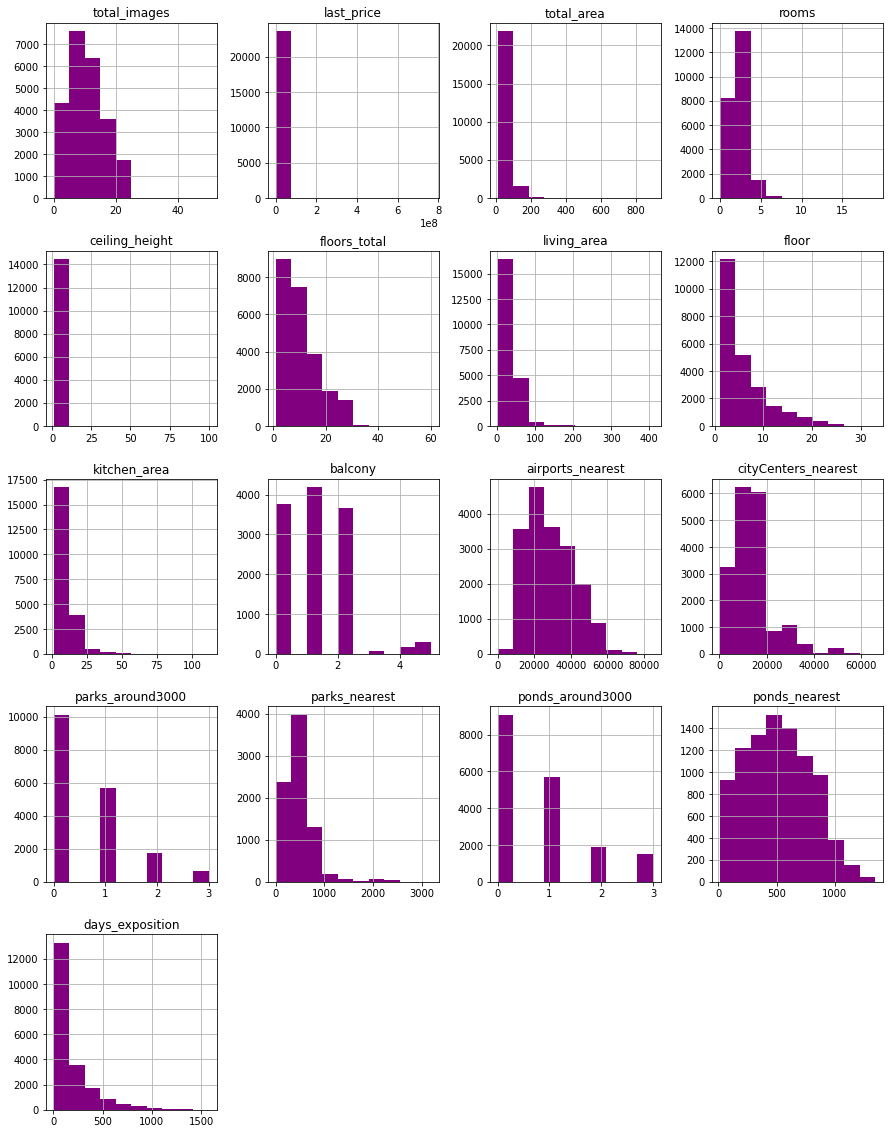

In [4]:
data.hist(figsize=(15, 20), color = "purple");

Некоторые гистограммы похожи (или отдаленно похожи) на графики нормального распределения. Это количество фотографий, расстояние до аэропорта, расстояние до ближайшего парка. Для подавляющего числа объявлений характерно наличие фотографий, больше всего объявлений с фото от 5 до 10 шт., чуть меньше от 10 до 15.

В основном все продаваемые объекты находятся в домах до 10 этажей, квартиры располагаются на 1-3 этажах и в 2 раза меньше на 4-7 этажах. Больше всего недвижимости площадью до 100 м.кв. и с 2-3 комнатами. Жилая площадь продаваемых квартир составляет в основном до 40 м.кв. Квартир без балконов, с 1 балконом и 2 балконами примерно одинаковое количество. Высота потолков до 10 м. Площадь кухни до 10 м.кв. Квартиры располагаются на расстоянии в 10-40 км.от аэропорта и до 20 км.от центра города. Большинство объектов недвижимости находятся до 700 м от парка и 500-1000м от водоемов. Количество дней размещения объявления составляет примерно до 200 дней. График с "ценой" не очень неинформативен.

## Предобработка данных

### Найдите и изучите пропущенные значения в столбцах
- Определите, в каких столбцах есть пропуски.
- Заполните пропущенные значения там, где это возможно. Например, если продавец не указал число балконов, то, скорее всего, в его квартире их нет. Такие пропуски правильно заменить на 0. Если логичную замену предложить невозможно, то оставьте эти значения пустыми. Пропуски — тоже важный сигнал, который нужно учитывать.
В ячейке с типом markdown укажите причины, которые могли привести к пропускам в данных.

In [5]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

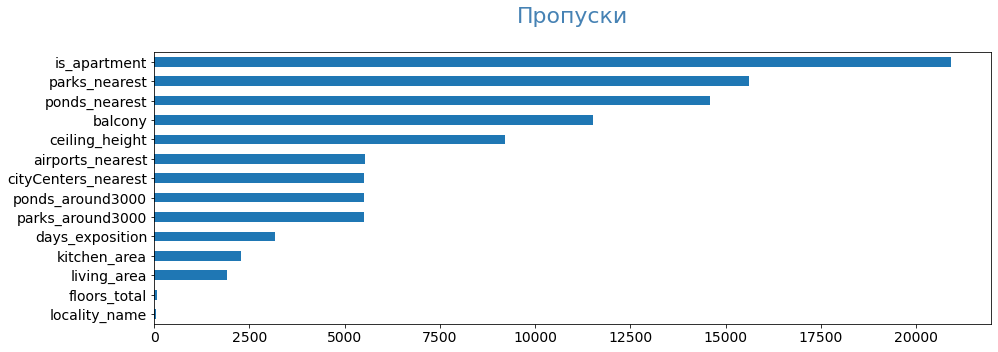

In [6]:
make_bars(data)

In [7]:
# где нет балкона - значит его скорее всего и нет
data['balcony'] = data['balcony'].fillna('0')

# где не указано - ноль - потому что если б было то указали бы
data['parks_around3000'] = data['parks_around3000'].fillna('0')
data['ponds_around3000'] = data['ponds_around3000'].fillna('0')

# где не апартаменты - False - потому что если б были апартаменты то указали бы
data['is_apartment'] = data['is_apartment'].fillna(False)

data = data.reset_index(drop=True)

In [10]:
print('Локация не указана: ',data.loc[data['locality_name'].isna()]['last_price'].count())

Локация не указана:  49


In [11]:
data.drop(data.loc[data['locality_name'].isna()].index, inplace=True)
data = data.reset_index(drop=True)
print('Локация не указана: ',data.loc[data['locality_name'].isna()]['last_price'].count())

Локация не указана:  0


<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера V1<a class="tocSkip"></h2>


<b>На доработку🤔:</b>
Такое заполнение ничем не обосновано. Также пропусков в названии населенного пункта очень мало, их лучше удалить.


<div class="alert alert-info">
<h2> Комментарий V2<a class="tocSkip"> </h2>

<b>Поправил, удалил незаполненные</b>
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера V2<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Верное решение, молодец!

In [13]:
print('Этаж не указан: ',data.loc[data['floors_total'].isna()]['last_price'].count())

Этаж не указан:  85


In [14]:
data.drop(data.loc[data['floors_total'].isna()].index, inplace=True)
data = data.reset_index(drop=True)
print('Этаж не указан: ',data.loc[data['floors_total'].isna()]['last_price'].count())

Этаж не указан:  0


In [15]:
# посмотрим на пропуски в этажнности
display(data['floors_total'].describe()) 
display(data['floors_total'].isna().sum())

count              23565.0
mean    10.675875238701463
std      6.594823458352333
min                    1.0
25%                    5.0
50%                    9.0
75%                   16.0
max                   60.0
Name: floors_total, dtype: float64

0

Медианное значение для этажности домов равняется 9. Можем заполнить.

In [16]:
# заполним пропуски в колонке 'floors_total' медианным значением этажности дома
data['floors_total'] = data['floors_total'].fillna(data['floor'].median())

In [17]:
print('Этаж больше чем этажей:')
display(data.query('floors_total < floor').count()['floor'])

Этаж больше чем этажей:


0

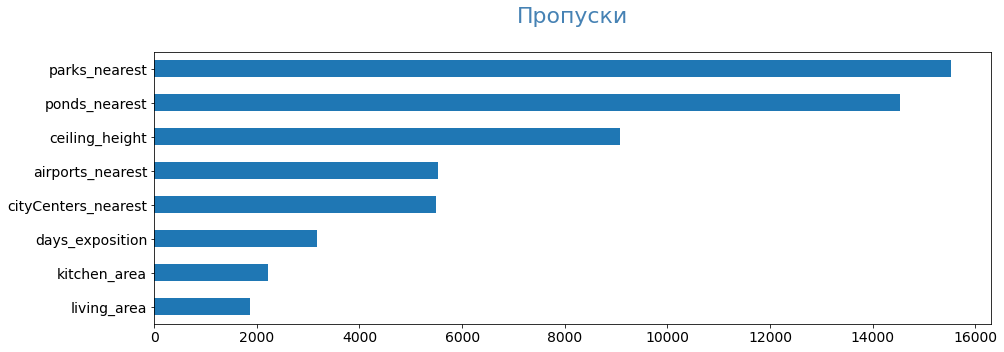

In [21]:
make_bars(data)

Оставлены пропуски:
- **ceiling_height, living_area, kitchen_area** - не указано, мы не знаем, плюс до обработки аномалий не можем заполнить как-либо.
- **days_exposition** - пока невозможно предположить, лучше так, чем заполнять чем попало.
- **airports_nearest** - может быть что нет аэропорта, тогда расстояния нет, а не ноль.
- **cityCenters_nearest** - может быть что нет города центра рядом, тогда расстояния нет, а не ноль.
- **parks_nearest, ponds_nearest** - если нет парка или пруда, тогда расстояния нет, а не ноль.

###  Рассмотрите типы данных в каждом столбце:
- Найдите столбцы, в которых нужно изменить тип данных.
- Преобразуйте тип данных в выбранных столбцах.
- В ячейке с типом markdown поясните, почему нужно изменить тип данных.

In [22]:
# либо да либо нет
data['is_apartment'] = data['is_apartment'].astype(bool)
# не может быть дробным
data['floors_total'] = data['floors_total'].astype(int)
data['balcony'] = data['balcony'].astype(int)
data['parks_around3000'] = data['parks_around3000'].astype(int)
data['ponds_around3000'] = data['ponds_around3000'].astype(int)
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [23]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23565 entries, 0 to 23564
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        14481 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           21700 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          21343 non-null  float64       
 13  balcony         

Поменял тип данных:
- **first_day_exposition** - формат дата время;
- **is_apartment** - либо апартаменты либо нет;
- **floors_total, balcony, parks_around3000, ponds_around3000** - в штуках, не может быть дробным.

Хотелось бы days_exposition сделать int, но там na, и лучше пока не трогать.

### Изучите уникальные значения в столбце с названиями и устраните неявные дубликаты.
Например, «поселок Рябово» и «поселок городского типа Рябово», «поселок Тельмана» и «посёлок Тельмана» — это обозначения одних и тех же населённых пунктов. Вы можете заменить названия в существующем столбце или создать новый с названиями без дубликатов.

In [24]:
print('Явных дубликатов:',data.duplicated().sum())

Явных дубликатов: 0


In [25]:
print('Уникальных названия локации: ',len(data['locality_name'].unique()))
sorted(data['locality_name'].unique())

Уникальных названия локации:  364


['Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалёво',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'городской поселок Большая Ижора',
 'городской поселок Янино-1',
 'городской посёлок Будогощь',
 'городской посёлок Виллози',
 'городской посёлок Лесогорский',
 'городской посёлок Мга',
 'городской посёлок Назия',
 'городской посёлок Новоселье',
 'городской посёлок Павлово',
 'городской посёлок Рощино',
 'городской посёлок Свирьстрой',
 'городской посёлок Советский',
 'городской посёлок Фёдоровское',
 'городск

In [26]:
data['locality_name'] = data['locality_name'].str.replace('посёлок', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('городской поселок', 'поселок городского типа')
data['locality_name'] = data['locality_name'].str.replace('поселок станции', 'поселок при железнодорожной станции')

In [27]:
print('Уникальных названия локации после обработки неявных дубликатов: ',len(data['locality_name'].unique()))

Уникальных названия локации после обработки неявных дубликатов:  321


**Заменил по логике неоднозначные названия одних и тех же мест.**

### Посчитайте и добавьте в таблицу новые столбцы

In [28]:
data['price_m2'] = data['last_price'] / data['total_area']

data['pub_weekday'] = data['first_day_exposition'].dt.dayofweek.astype(int)
data['pub_month'] = data['first_day_exposition'].dt.month.astype(int)
data['pub_year'] = data['first_day_exposition'].dt.year.astype(int)

data['floor_type'] = 'другой'
data.loc[data['floor']==data['floors_total'],'floor_type'] = 'последний'
data.loc[data['floor']==1,'floor_type'] = 'первый' #если всего 1 этаж и это 1й, то он и первый и последний, но будет первый

data['cityCenters_km'] = data['cityCenters_nearest']/1000
#data['cityCenters_km'] = data['cityCenters_km'].round().astype(int)

In [29]:
f1f = data.loc[ (data['floor']==1) & (data['floor']==data['floors_total'])]['floor'].count()
print(f'Найдено {f1f} строк, где 1 этаж и он и первый и последний, пусть будет значение "один", т.к. это частные дома видимо и могут попортить статистику многоквартирных.')
data.loc[ (data['floor']==1) & (data['floor']==data['floors_total']),'floor_type'] = 'один'

Найдено 25 строк, где 1 этаж и он и первый и последний, пусть будет значение "один", т.к. это частные дома видимо и могут попортить статистику многоквартирных.


In [30]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m2,pub_weekday,pub_month,pub_year,floor_type,cityCenters_km
0,20,13000000.0,108.0,2019-03-07,3,2.7,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370.37037037036,3,3,2019,другой,16.028
1,7,3350000.0,40.4,2018-12-04,1,NaN,11,18.6,1,False,False,False,11.0,2,поселок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,82920.79207920792,1,12,2018,первый,18.603
2,10,5196000.0,56.0,2015-08-20,2,NaN,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785.71428571429,3,8,2015,другой,13.933
3,0,64900000.0,159.0,2015-07-24,3,NaN,14,NaN,9,False,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,408176.10062893084,4,7,2015,другой,6.8
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000.0,1,6,2018,другой,8.098
5,10,2890000.0,30.4,2018-09-10,1,NaN,12,14.4,5,False,False,False,9.1,0,поселок городского типа Янино-1,NaN,NaN,0,NaN,0,NaN,55.0,95065.78947368421,0,9,2018,другой,NaN
6,6,3700000.0,37.3,2017-11-02,1,NaN,26,10.6,6,False,False,False,14.4,1,поселок Парголово,52996.0,19143.0,0,NaN,0,NaN,155.0,99195.71045576409,3,11,2017,другой,19.143
7,5,7915000.0,71.6,2019-04-18,2,NaN,24,NaN,22,False,False,False,18.9,2,Санкт-Петербург,23982.0,11634.0,0,NaN,0,NaN,NaN,110544.69273743017,3,4,2019,другой,11.634
8,20,2900000.0,33.16,2018-05-23,1,NaN,27,15.43,26,False,False,False,8.81,0,поселок Мурино,NaN,NaN,0,NaN,0,NaN,189.00000000000003,87454.76477683957,2,5,2018,другой,NaN
9,18,5400000.0,61.0,2017-02-26,3,2.5,9,43.6,7,False,False,False,6.5,2,Санкт-Петербург,50898.0,15008.0,0,NaN,0,NaN,289.0,88524.59016393442,6,2,2017,другой,15.008


**Посчитано и добавлено в таблицу:**
- price_m2 - цена одного квадратного метра
- pub_weekday - день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- pub_month - месяц публикации объявления (1 - январь ...)
- pub_year - год публикации объявления
- floor_type - тип этажа квартиры (значения — «первый», «последний», «один», «другой»)
- cityCenters_km - расстояние в км до центра города

### Найдите и устраните редкие и выбивающиеся значения.
Например, в столбце ceiling_height может быть указана высота потолков 25 м и 32 м. Логично предположить, что на самом деле это вещественные значения: 2.5 м и 3.2 м. Попробуйте обработать аномалии в этом и других столбцах.
- Если природа аномалии понятна и данные действительно искажены, то восстановите корректное значение.
- В противном случае удалите редкие и выбивающиеся значения.
- В ячейке с типом markdown опишите, какие особенности в данных вы обнаружили.

In [31]:
display(data['ceiling_height'].isna().sum()) # глянем сколько пропусков
data['ceiling_height'].describe() # глянем среднее по высоте

9084

count              14481.0
mean    2.7712830605621157
std     1.2619828124167434
min                    1.0
25%                   2.51
50%                   2.65
75%                    2.8
max                  100.0
Name: ceiling_height, dtype: float64

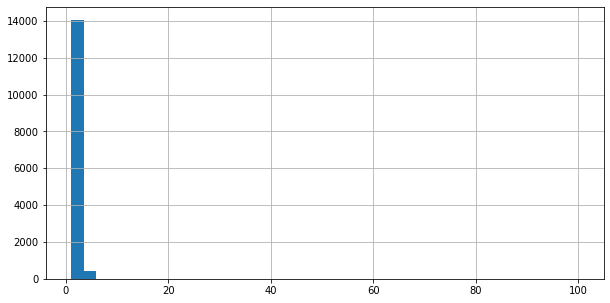

In [32]:
data['ceiling_height'].hist(bins=40, figsize = (10,5)); 

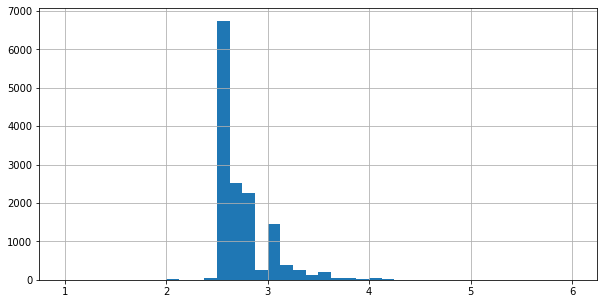

In [33]:
data['ceiling_height'].hist(bins=40, figsize = (10,5), range=(1,6)); 

Как видим почти нет квартир с высотой > 5 метров. Посмотрим на них:

In [34]:
data.query('ceiling_height>5').sort_values(by='ceiling_height')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m2,pub_weekday,pub_month,pub_year,floor_type,cityCenters_km
461,15,66571000.0,280.3,2015-06-11,6,5.2,8,159.5,7,False,False,False,21.1,0,Санкт-Петербург,26316.0,6655.0,3,187.0,1,616.0,578.0,237499.10809846592,3,6,2015,другой,6.655
12557,14,3900000.0,50.0,2018-03-29,1,5.3,5,NaN,5,False,False,False,NaN,0,Санкт-Петербург,19644.0,3918.0,1,505.0,1,92.0,8.0,78000.0,3,3,2018,последний,3.918
1022,20,155000000.0,310.0,2018-10-12,5,5.3,3,190.0,3,False,False,False,63.0,2,Санкт-Петербург,24899.0,4785.0,0,NaN,1,603.0,NaN,500000.0,4,10,2018,последний,4.785
7540,17,38000000.0,143.0,2017-11-02,3,5.5,5,83.0,5,False,False,False,29.0,1,Санкт-Петербург,26333.0,6448.0,3,479.0,0,NaN,NaN,265734.26573426573,3,11,2017,последний,6.448
1383,20,59800000.0,399.0,2015-01-21,5,5.6,6,NaN,6,False,False,False,NaN,0,Санкт-Петербург,26204.0,6934.0,2,149.0,2,577.0,719.0000000000001,149874.68671679197,2,1,2015,последний,6.934
21109,0,8200000.0,71.0,2017-07-21,0,5.8,5,68.0,5,False,True,False,NaN,0,Санкт-Петербург,20170.0,1261.0,2,295.0,3,366.0,30.0,115492.95774647887,4,7,2017,последний,1.261
20151,17,119000000.0,187.6,2017-07-10,4,6.0,7,147.0,7,False,False,False,15.6,0,Санкт-Петербург,26902.0,5605.0,3,484.0,1,305.0,259.0,634328.3582089553,0,7,2017,последний,5.605
17345,0,5350000.0,54.0,2015-06-16,2,8.0,5,29.0,2,False,False,False,NaN,1,Красное Село,24638.0,28062.0,0,NaN,0,NaN,469.0,99074.07407407407,1,6,2015,другой,28.062
15656,14,5600000.0,67.0,2016-11-11,3,8.0,16,41.0,1,False,False,False,8.0,0,Санкт-Петербург,32691.0,11035.0,1,723.0,0,NaN,474.0,83582.0895522388,4,11,2016,первый,11.035
3459,3,1400000.0,30.0,2018-03-16,1,8.0,5,15.3,2,False,False,False,7.3,0,деревня Нурма,NaN,NaN,0,NaN,0,NaN,125.0,46666.666666666664,4,3,2018,другой,NaN


Я допускаю, что могут быть квартиры с высотой 5-6 метров, и даже один объект 14 метров, т.к. это не опечатка типа 1.4 метра.
Поэтому всё что >14 метров делим на 10, т.к. явно там точка не там где надо проставлена.

In [35]:
data.loc[data['ceiling_height']>14,'ceiling_height'] = data.loc[data['ceiling_height']>14,'ceiling_height']/10

In [36]:
display(data['ceiling_height'].isna().sum()) # глянем сколько пропусков
display(data['ceiling_height'].describe()) # глянем среднее по высоте
print('Видим, что теперь данные правдоподобны. Выкидывать "аномалии" пока нет причин.')

9084

count               14481.0
mean     2.7293253228368206
std     0.31977868171053453
min                     1.0
25%                    2.51
50%                    2.65
75%                     2.8
max                    14.0
Name: ceiling_height, dtype: float64

Видим, что теперь данные правдоподобны. Выкидывать "аномалии" пока нет причин.


In [37]:
print(data.query('living_area>total_area')['living_area'].count(),' - нет нелогичного')
print(data.query('kitchen_area>=total_area')['living_area'].count(),' - нет нелогичного')

0  - нет нелогичного
0  - нет нелогичного


In [38]:
data.query('living_area.isnull() & ~kitchen_area.isnull()')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m2,pub_weekday,pub_month,pub_year,floor_type,cityCenters_km
7,5,7915000.0,71.6,2019-04-18,2,NaN,24,NaN,22,False,False,False,18.9,2,Санкт-Петербург,23982.0,11634.0,0,NaN,0,NaN,NaN,110544.69273743017,3,4,2019,другой,11.634
116,18,10999000.0,97.2,2017-11-13,3,2.5,16,NaN,16,False,False,False,18.3,5,Санкт-Петербург,19426.0,21138.0,0,NaN,2,390.0,394.0,113158.43621399176,0,11,2017,последний,21.138
165,17,7430000.0,60.2,2019-02-28,2,2.5,4,NaN,2,False,False,False,10.2,0,Сестрорецк,54526.0,35625.0,0,NaN,0,NaN,NaN,123421.926910299,3,2,2019,другой,35.625
236,5,5420000.0,43.4,2019-04-16,1,NaN,24,NaN,2,False,False,False,12.4,2,Санкт-Петербург,23982.0,11634.0,0,NaN,0,NaN,NaN,124884.79262672811,1,4,2019,другой,11.634
358,6,4990000.0,57.84,2018-08-22,2,2.65,27,NaN,13,False,False,False,10.19,2,поселок Мурино,NaN,NaN,0,NaN,0,NaN,60.0,86272.47579529737,2,8,2018,другой,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23402,9,3900000.0,39.0,2017-12-01,1,2.65,16,NaN,15,False,False,False,10.0,1,Санкт-Петербург,14730.0,13526.0,0,NaN,0,NaN,464.0,100000.0,4,12,2017,другой,13.526
23452,17,2450000.0,66.0,2019-04-03,3,NaN,5,NaN,1,False,False,False,8.0,0,поселок городского типа Мга,NaN,NaN,0,NaN,0,NaN,NaN,37121.21212121212,2,4,2019,первый,NaN
23455,7,12100000.0,88.0,2017-07-07,3,NaN,10,NaN,5,False,False,False,14.0,0,Санкт-Петербург,37412.0,8370.0,1,392.0,2,359.0,200.0,137500.0,4,7,2017,другой,8.37
23456,7,8100000.0,69.0,2015-10-14,2,NaN,10,NaN,8,False,False,False,10.0,2,Санкт-Петербург,23617.0,5223.0,0,NaN,1,874.0,823.0,117391.30434782608,2,10,2015,другой,5.223


Как я вижу, есть строки, где указана площадь кухни, но нет жилой площади. Это странно. То есть может быть объект вообще не жилой, тогда там и кухни не будет. А если есть кухня, то можем заполнить медианой для них.

In [39]:
print('Таких квартир процент:')
data.query('living_area.isnull() & ~kitchen_area.isnull()')['kitchen_area'].count()/data.shape[0]*100

Таких квартир процент:


1.8586887332908975

Возьмем квартиры где указана общая площадь, площадь кухни и жилая площадь.

Посчитаем сколько обычно процентов от общей площади занимает жилая и её проставим где у нас нет.

In [40]:
df_for_kitchen = data.copy()
df_for_kitchen = df_for_kitchen.query('~living_area.isnull() & ~kitchen_area.isnull() & ~total_area.isnull()')
df_for_kitchen['livig_perc'] = df_for_kitchen['living_area']/df_for_kitchen['total_area']
print('В среднем жилая площадь в процентах:')
df_for_kitchen['livig_perc'].describe()['mean']

В среднем жилая площадь в процентах:


0.5626426627157503

In [41]:
# тут я с итерацией и заменами запутался, не знаю как правильно умножить одну колонку на другую по query
for index, row in data.query('living_area.isnull() & ~kitchen_area.isnull()')['total_area'].iteritems():
    data.loc[index,'living_area'] = data.loc[index,'total_area'] * df_for_kitchen['livig_perc'].describe()['mean']

Проставили жилую площадь там где её не было, но была кухня, по среднему множителю жилой площади от общей из имеющихся.

In [42]:
display(data['last_price'].describe())
display(data.sort_values(by='last_price').head(5))

count             23565.0
mean    6540058.260004244
std      10910934.7215143
min               12190.0
25%             3400000.0
50%             4646000.0
75%             6790000.0
max           763000000.0
Name: last_price, dtype: float64

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m2,pub_weekday,pub_month,pub_year,floor_type,cityCenters_km
8750,7,12190.0,109.0,2019-03-20,2,2.75,25,32.0,25,False,False,False,40.5,0,Санкт-Петербург,36421.0,9176.0,1,805.0,0,NaN,8.0,111.8348623853211,2,3,2019,последний,9.176
17359,7,430000.0,30.4,2019-04-22,1,NaN,2,16.0,1,False,False,False,6.0,0,Сланцы,NaN,NaN,0,NaN,0,NaN,NaN,14144.736842105263,0,4,2019,первый,NaN
14825,5,430000.0,54.0,2018-06-26,2,NaN,3,NaN,3,False,False,False,NaN,0,поселок при железнодорожной станции Свирь,NaN,NaN,0,NaN,0,NaN,44.00000000000001,7962.962962962963,1,6,2018,последний,NaN
16185,18,440000.0,40.0,2018-07-10,1,NaN,5,NaN,1,False,False,False,NaN,0,деревня Старополье,NaN,NaN,0,NaN,0,NaN,45.00000000000001,11000.0,1,7,2018,первый,NaN
9535,7,450000.0,43.4,2018-08-31,2,NaN,5,30.3,3,False,False,False,5.5,0,деревня Старополье,NaN,NaN,0,NaN,0,NaN,96.0,10368.663594470047,4,8,2018,другой,NaN


Тут я вижу квартиру за 12190 рублей. Может это в баксах, может это 1 219 000 рублей.. за двушку? А может и 12 млн. Я не знаю, лучше убрать эту строку.

In [43]:
data = data.drop(index=[8793])
data = data.reset_index(drop=True)

#### "Редкие" (лишние) для нашей работы значения

Наше исследование все же требует исключить редкие значния.<br/>
Грубо говоря, я не сомневаюсь в том, что бывают и 19-ти комнатные помещения, и помещения без кухни, и 60-ти этажные дома.<br/>
Но нам же важно чтобы была адекватная выборка, а по здоровенным квартирам и высоткам, возможно, есть другие датасеты.

In [44]:
do_quant(data)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
0.01,1.00,25.32,2.50,4.00,"1,000,000.00",13.00,5.00,1.00,2.00
0.25,1.00,40.00,2.51,45.00,"3,400,000.00",18.70,7.00,2.00,5.00
0.5,2.00,52.00,2.65,95.00,"4,646,000.00",30.00,9.10,4.00,9.00
0.75,3.00,69.70,2.80,231.00,"6,790,000.00",42.30,12.00,8.00,16.00
0.9,3.00,93.40,3.05,459.70,"10,900,000.00",55.00,15.90,13.00,22.00
0.9976,7.00,309.83,4.21,"1,312.06","82,000,000.00",182.97,50.00,25.00,27.00


In [45]:
print('Возможно странные комнаты')
print(data['rooms'].describe())
_perc = data.query('rooms>5')['rooms'].count()/data.shape[0]*100
print('Комнат > 5:',data.query('rooms>5')['rooms'].count(),'(',_perc,'%)')
data.sort_values(by='rooms',ascending=False).head(10)

Возможно странные комнаты
count             23564.0
mean    2.070616194194534
std     1.078596454484584
min                   0.0
25%                   1.0
50%                   2.0
75%                   3.0
max                  19.0
Name: rooms, dtype: float64
Комнат > 5: 194 ( 0.8232897640468511 %)


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m2,pub_weekday,pub_month,pub_year,floor_type,cityCenters_km
14413,6,32250000.0,374.6,2018-06-09,19,NaN,5,264.5,2,False,False,False,27.6,0,Санкт-Петербург,19497.0,3574.0,0,NaN,2,548.0,114.0,86091.83128670581,5,6,2018,другой,3.574
18743,6,28500000.0,270.0,2015-03-02,16,3.0,4,180.0,4,False,False,False,13.0,1,Санкт-Петербург,23575.0,4142.0,1,516.0,0,NaN,1365.0,105555.55555555556,0,3,2015,последний,4.142
5330,20,65000000.0,590.0,2019-02-14,15,3.5,6,409.0,3,False,False,False,100.0,0,Санкт-Петербург,24447.0,4666.0,1,767.0,0,NaN,14.0,110169.49152542373,3,2,2019,другой,4.666
862,5,25000000.0,363.0,2017-12-23,14,3.16,5,222.0,4,False,False,False,16.6,0,Санкт-Петербург,38076.0,7950.0,0,NaN,2,435.0,418.0,68870.52341597796,5,12,2017,другой,7.95
20711,6,28659000.0,245.4,2016-03-31,14,NaN,4,168.3,2,False,False,False,25.9,0,Санкт-Петербург,21104.0,2054.0,3,541.0,2,118.0,95.0,116784.84107579461,3,3,2016,другой,2.054
19430,8,420000000.0,900.0,2017-12-06,12,2.8,25,409.7,25,False,False,False,112.0,0,Санкт-Петербург,30706.0,7877.0,0,NaN,2,318.0,106.0,466666.6666666667,2,12,2017,последний,7.877
9641,8,33000000.0,194.1,2017-02-07,11,3.43,5,129.0,2,False,False,False,11.9,0,Санкт-Петербург,21469.0,1015.0,1,686.0,2,66.0,813.0,170015.45595054096,1,2,2017,другой,1.015
645,3,17500000.0,183.7,2018-07-01,11,3.4,7,138.8,7,False,False,False,13.3,0,Санкт-Петербург,23606.0,3148.0,0,NaN,0,NaN,NaN,95264.01741970606,6,7,2018,последний,3.148
18786,11,40000000.0,290.0,2016-06-21,10,3.5,6,189.4,6,False,False,False,30.0,1,Санкт-Петербург,26229.0,4932.0,3,316.0,1,227.0,77.0,137931.0344827586,1,6,2016,последний,4.932
18016,4,15500000.0,216.1,2016-07-04,10,3.15,5,161.4,2,False,False,False,19.8,0,Санкт-Петербург,24353.0,4921.0,1,368.0,0,NaN,11.000000000000002,71726.05275335493,0,7,2016,другой,4.921


In [46]:
data.sort_values(by='rooms',ascending=True).head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m2,pub_weekday,pub_month,pub_year,floor_type,cityCenters_km
9813,10,2350000.0,25.0,2017-12-03,0,NaN,22,25.0,17,False,False,True,NaN,2,поселок Мурино,NaN,NaN,0,NaN,0,NaN,13.0,94000.0,6,12,2017,другой,NaN
8675,10,4000000.0,26.0,2018-02-27,0,2.8,16,22.0,7,False,True,False,NaN,2,Санкт-Петербург,10796.0,14361.0,0,NaN,0,NaN,50.0,153846.15384615384,1,2,2018,другой,14.361
9958,20,5050000.0,44.2,2017-09-14,0,2.7,9,32.2,1,False,True,False,NaN,0,Санкт-Петербург,24329.0,5955.0,0,NaN,2,520.0,69.0,114253.39366515836,3,9,2017,первый,5.955
8678,9,3200000.0,26.0,2018-07-16,0,NaN,19,14.0,17,False,True,False,NaN,1,поселок Шушары,11858.0,17411.0,0,NaN,0,NaN,266.0,123076.92307692308,0,7,2018,другой,17.411
12917,5,2500000.0,29.0,2019-04-17,0,NaN,9,20.0,3,False,True,False,NaN,0,Санкт-Петербург,45274.0,21206.0,0,NaN,3,319.0,5.0,86206.89655172414,2,4,2019,другой,21.206
15347,0,2200000.0,27.0,2017-01-01,0,NaN,25,15.0,5,False,False,True,NaN,2,поселок Парголово,53791.0,18006.0,1,733.0,3,865.0,336.0,81481.48148148147,6,1,2017,другой,18.006
19891,8,2700000.0,28.0,2017-11-10,0,NaN,21,20.0,6,False,False,True,NaN,2,Санкт-Петербург,21460.0,16788.0,0,NaN,1,170.0,17.0,96428.57142857143,4,11,2017,другой,16.788
2708,18,2400000.0,25.0,2017-08-16,0,NaN,25,21.0,12,False,True,False,NaN,2,поселок Мурино,NaN,NaN,0,NaN,0,NaN,384.00000000000006,96000.0,2,8,2017,другой,NaN
21356,3,3100000.0,22.7,2018-08-22,0,3.33,5,17.0,2,False,True,False,NaN,0,Санкт-Петербург,20081.0,3363.0,1,170.0,1,546.0,27.0,136563.87665198237,2,8,2018,другой,3.363
21633,0,2330000.0,23.0,2018-01-01,0,NaN,24,2.0,22,False,True,False,NaN,0,поселок Мурино,NaN,NaN,0,NaN,0,NaN,66.0,101304.34782608696,0,1,2018,другой,NaN


In [47]:
data.drop(data.loc[data['rooms']>5].index, inplace=True)
data = data.reset_index(drop=True)

In [48]:
print(f'{_perc:.2f}% от выборки наверное можно пожертвовать, убираю где комнат > 5')

0.82% от выборки наверное можно пожертвовать, убираю где комнат > 5


In [49]:
print('Возможно странные этажи')
print(data['floors_total'].describe())
_perc = data.query('floors_total>27')['floors_total'].count()/data.shape[0]*100
print('Этажей > 27:',data.query('floors_total>27')['floors_total'].count(),'(',_perc,'%)')
data.sort_values(by='floors_total',ascending=False).head(10)

Возможно странные этажи
count              23370.0
mean    10.715575524176295
std      6.602089949635397
min                    1.0
25%                    5.0
50%                    9.0
75%                   16.0
max                   60.0
Name: floors_total, dtype: float64
Этажей > 27: 54 ( 0.23106546854942236 %)


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m2,pub_weekday,pub_month,pub_year,floor_type,cityCenters_km
2223,12,3800000.0,45.5,2018-06-28,2,2.88,60,27.4,4,False,False,False,7.4,0,Кронштадт,67763.0,49488.0,2,342.0,3,614.0,166.0,83516.48351648351,3,6,2018,другой,49.488
16495,9,3978000.0,40.0,2018-09-24,1,2.65,52,10.5,18,False,False,False,14.0,0,Санкт-Петербург,20728.0,12978.0,1,793.0,0,NaN,45.00000000000001,99450.0,0,9,2018,другой,12.978
16696,5,4100000.0,40.0,2017-10-17,1,1.75,37,17.4,5,False,False,False,8.34,0,Санкт-Петербург,18732.0,20444.0,0,NaN,3,80.0,71.0,102500.0,1,10,2017,другой,20.444
393,15,5990000.0,54.0,2018-03-22,2,NaN,36,21.4,28,False,False,False,18.7,1,Санкт-Петербург,18732.0,20444.0,0,NaN,3,80.0,11.000000000000002,110925.92592592593,3,3,2018,другой,20.444
5726,17,8150000.0,80.0,2019-01-09,2,2.7,36,41.0,13,False,False,False,12.0,5,Санкт-Петербург,18732.0,20444.0,0,NaN,3,80.0,38.0,101875.0,2,1,2019,другой,20.444
10924,16,9200000.0,75.0,2019-02-22,2,2.7,36,40.0,29,False,False,False,12.0,2,Санкт-Петербург,18732.0,20444.0,0,NaN,3,80.0,NaN,122666.66666666667,4,2,2019,другой,20.444
9248,12,7390000.0,70.0,2017-02-21,2,2.7,35,28.0,3,False,False,False,23.0,2,Санкт-Петербург,18732.0,20444.0,0,NaN,3,80.0,236.0,105571.42857142857,1,2,2017,другой,20.444
4788,12,5500000.0,50.0,2017-06-22,1,2.8,35,22.0,4,False,False,False,13.0,0,Санкт-Петербург,18627.0,20339.0,1,609.0,3,145.0,537.0,110000.0,3,6,2017,другой,20.339
9453,9,3450000.0,24.8,2019-02-01,0,2.68,35,16.0,17,False,True,False,NaN,2,Санкт-Петербург,18732.0,20444.0,0,NaN,3,80.0,45.00000000000001,139112.90322580645,4,2,2019,другой,20.444
13775,19,6990000.0,65.0,2018-10-06,2,NaN,35,32.1,23,False,False,False,8.9,0,Санкт-Петербург,18732.0,20444.0,0,NaN,3,80.0,89.00000000000001,107538.46153846153,5,10,2018,другой,20.444


In [50]:
data.drop(data.loc[(data['floors_total']>27) & ~(data['floor_type'].isin(['первый', 'последний']))].index, inplace=True)
data = data.reset_index(drop=True)

In [51]:
print(f'{_perc:.2f}% от выборки можно было бы убрать целиком, но 1) нам не нужно исследовать этажность домов 2) нам важен этаж на котором квартира, а в 60-ти этажном доме 4й этаж. Удаляю все которые не последний и не первый, ну т.к. их итак мало.')

0.23% от выборки можно было бы убрать целиком, но 1) нам не нужно исследовать этажность домов 2) нам важен этаж на котором квартира, а в 60-ти этажном доме 4й этаж. Удаляю все которые не последний и не первый, ну т.к. их итак мало.


In [52]:
print('Возможно странные площади')
print(data['total_area'].describe())

Возможно странные площади
count              23316.0
mean     58.84534225424601
std     30.194134329284328
min                   12.0
25%                   40.0
50%                   51.8
75%                   69.0
max                  507.0
Name: total_area, dtype: float64


In [53]:
data[['total_area']].quantile([0.01, .25, .5, .75, .90, .95, .995, .9976]).style.format("{:,.2f}")

,total_area
0.01,25.30
0.25,40.00
0.5,51.80
0.75,69.00
0.9,91.30
0.95,111.00
0.995,200.13
0.9976,245.93


In [54]:
_perc = data.query('total_area>270')['total_area'].count()/data.shape[0]*100
print('Площадь > 270:',data.query('total_area>270')['total_area'].count(),'(',_perc,'%)')
data.sort_values(by='total_area',ascending=False).head(10)

Площадь > 270: 36 ( 0.1544004117344313 %)


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m2,pub_weekday,pub_month,pub_year,floor_type,cityCenters_km
7890,20,84000000.0,507.0,2015-12-17,5,4.45,7,301.5,7,True,False,False,45.5,1,Санкт-Петербург,NaN,5735.0,2,110.0,0,NaN,1078.0,165680.47337278107,3,12,2015,последний,5.735
14764,8,150000000.0,500.0,2016-01-13,4,3.2,7,NaN,7,False,False,False,NaN,0,Санкт-Петербург,33058.0,6150.0,3,209.0,3,531.0,303.0,300000.0,2,1,2016,последний,6.15
9673,1,43185328.0,494.1,2017-05-12,1,2.85,12,NaN,3,False,False,False,NaN,0,Санкт-Петербург,28529.0,6832.0,1,592.0,0,NaN,5.0,87401.99959522363,4,5,2017,другой,6.832
22133,7,91075000.0,491.0,2017-05-27,5,4.2,9,274.0,9,False,False,False,45.0,0,Санкт-Петербург,25525.0,5845.0,2,116.0,0,NaN,115.0,185488.7983706721,5,5,2017,последний,5.845
6514,20,99000000.0,488.0,2017-04-09,5,2.95,20,216.0,17,False,False,False,50.0,0,Санкт-Петербург,27641.0,4598.0,1,646.0,1,368.0,351.00000000000006,202868.8524590164,6,4,2017,другой,4.598
6118,8,34000000.0,470.3,2018-01-14,4,NaN,3,248.7,3,False,False,False,40.0,0,Санкт-Петербург,43756.0,15459.0,1,852.0,3,122.0,179.00000000000003,72294.28024665108,6,1,2018,последний,15.459
3615,12,28789000.0,441.98,2019-01-23,4,NaN,6,248.6768040671073,6,False,False,False,35.05,0,Санкт-Петербург,20552.0,5181.0,0,NaN,0,NaN,NaN,65136.43151273813,2,1,2019,последний,5.181
21777,14,27000000.0,422.2,2018-10-18,5,2.7,13,NaN,11,False,False,False,NaN,0,Санкт-Петербург,46625.0,16554.0,0,NaN,0,NaN,NaN,63950.73424917101,3,10,2018,другой,16.554
14458,15,401300000.0,401.0,2016-02-20,5,NaN,9,204.0,9,False,False,False,24.0,3,Санкт-Петербург,21912.0,2389.0,1,545.0,1,478.0,393.0,1000748.1296758105,5,2,2016,последний,2.389
1363,20,59800000.0,399.0,2015-01-21,5,5.6,6,NaN,6,False,False,False,NaN,0,Санкт-Петербург,26204.0,6934.0,2,149.0,2,577.0,719.0000000000001,149874.68671679197,2,1,2015,последний,6.934


In [55]:
data.drop(data.loc[(data['total_area']>270)].index, inplace=True)
data = data.reset_index(drop=True)

In [56]:
print(f'{_perc:.2f}% от выборки можно пожертвовать. Таких объектов очень мало.')

0.15% от выборки можно пожертвовать. Таких объектов очень мало.


In [57]:
print('Возможно странные цены')
print(data['last_price'].describe())

Возможно странные цены
count             23280.0
mean    6138704.407731959
std     7169783.144338174
min               12190.0
25%             3400000.0
50%             4600000.0
75%             6690000.0
max           330000000.0
Name: last_price, dtype: float64


In [58]:
data[['last_price']].quantile([0.01, .25, .5, .75, .90, .95, .97, .995, .9976, .998]).style.format("{:,.2f}")

,last_price
0.01,"1,000,000.00"
0.25,"3,400,000.00"
0.5,"4,600,000.00"
0.75,"6,690,000.00"
0.9,"10,500,000.00"
0.95,"14,343,806.00"
0.97,"18,000,000.00"
0.995,"41,735,680.00"
0.9976,"60,399,758.64"
0.998,"65,000,000.00"


In [59]:
_perc = data.query('last_price>48000000')['last_price'].count()/data.shape[0]*100
print('Цена > 48кк:',data.query('last_price>48000000')['last_price'].count(),'(',_perc,'%)')
data.sort_values(by='last_price',ascending=False).head(10)

Цена > 48кк: 90 ( 0.3865979381443299 %)


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m2,pub_weekday,pub_month,pub_year,floor_type,cityCenters_km
1405,19,330000000.0,190.0,2018-04-04,3,3.5,7,95.0,5,False,False,False,40.0,0,Санкт-Петербург,23011.0,1197.0,3,519.0,3,285.0,233.0,1736842.105263158,2,4,2018,другой,1.197
22430,18,289238400.0,187.5,2019-03-19,2,3.37,6,63.7,6,False,False,False,30.2,0,Санкт-Петербург,22494.0,1073.0,3,386.0,3,188.0,NaN,1542604.8,1,3,2019,последний,1.073
8740,13,190870000.0,268.0,2016-03-25,3,NaN,8,132.0,7,False,False,False,40.0,0,Санкт-Петербург,32440.0,5297.0,0,NaN,2,198.0,901.0,712201.4925373135,4,3,2016,другой,5.297
18819,20,160000000.0,243.0,2018-11-12,5,NaN,5,145.0,4,False,False,False,33.0,0,Санкт-Петербург,22640.0,555.0,3,285.0,1,200.0,18.0,658436.2139917696,0,11,2018,другой,0.555
2487,16,159984000.0,242.4,2015-08-27,4,3.85,9,131.0,7,False,False,False,20.0,0,Санкт-Петербург,21946.0,2242.0,1,679.0,1,227.0,501.0,660000.0,3,8,2015,другой,2.242
16201,12,159000000.0,260.0,2017-04-04,4,NaN,5,180.0,4,False,False,False,30.0,2,Санкт-Петербург,21740.0,436.0,2,138.0,3,620.0,178.00000000000003,611538.4615384615,1,4,2017,другой,0.436
21841,16,148000000.0,256.0,2016-03-16,5,NaN,6,179.0,5,False,False,False,36.0,0,Санкт-Петербург,24072.0,3639.0,2,727.0,3,462.0,233.0,578125.0,2,3,2016,другой,3.639
12448,16,140000000.0,241.0,2015-07-24,5,3.0,5,NaN,4,False,False,False,NaN,0,Санкт-Петербург,23512.0,3503.0,3,413.0,3,83.0,399.0,580912.8630705394,4,7,2015,другой,3.503
17595,17,135000000.0,166.0,2019-02-07,3,3.3,7,52.0,1,False,False,False,64.0,0,Санкт-Петербург,32863.0,5955.0,2,230.0,3,215.0,NaN,813253.0120481928,3,2,2019,первый,5.955
1891,11,125000000.0,224.5,2017-01-24,4,NaN,4,163.5,3,False,False,False,30.0,1,Санкт-Петербург,22805.0,2335.0,0,NaN,2,497.0,174.00000000000003,556792.873051225,1,1,2017,другой,2.335


In [60]:
data.drop(data.loc[(data['last_price']>48000000)].index, inplace=True)
data = data.reset_index(drop=True)

In [61]:
print(f'{_perc:.2f}% от выборки можно исключить.')

0.39% от выборки можно исключить.


In [62]:
print('Возможно странная жилплощадь')
print(data['living_area'].describe())

Возможно странная жилплощадь
count              21793.0
mean     33.13141973812612
std     17.172557539897873
min                    2.0
25%                   18.6
50%                   30.0
75%                   42.0
max                  175.0
Name: living_area, dtype: float64


**Гуглим: санитарная норма обеспеченности жильем — 6 м2 на человека. Поэтому странные квартиры можно точно выкинуть.**

In [63]:
_perc = data.query('living_area<6')['living_area'].count()/data.shape[0]*100
print('Площадь < 6м2:',data.query('living_area<6')['living_area'].count(),'(',_perc,'%)')
data.sort_values(by='living_area').head(10)

Площадь < 6м2: 5 ( 0.0215610176800345 %)


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m2,pub_weekday,pub_month,pub_year,floor_type,cityCenters_km
13614,20,6350000.0,52.0,2018-02-06,2,3.0,6,2.0,2,False,False,False,9.0,0,Санкт-Петербург,32453.0,6521.0,0,NaN,1,1012.0,91.0,122115.38461538461,1,2,2018,другой,6.521
21296,0,2330000.0,23.0,2018-01-01,0,NaN,24,2.0,22,False,True,False,NaN,0,поселок Мурино,NaN,NaN,0,NaN,0,NaN,66.0,101304.34782608696,0,1,2018,другой,NaN
3168,7,4440000.0,41.0,2017-07-02,1,NaN,17,3.0,17,False,False,False,11.0,0,Санкт-Петербург,19272.0,13073.0,0,NaN,0,NaN,216.0,108292.68292682926,6,7,2017,последний,13.073
17200,11,2680000.0,22.0,2018-08-11,0,NaN,25,5.0,8,False,True,False,NaN,2,Санкт-Петербург,22735.0,11618.0,1,835.0,1,652.0,70.0,121818.18181818182,5,8,2018,другой,11.618
21477,15,6100000.0,77.6,2019-02-28,4,2.5,9,5.4,1,False,False,False,9.8,0,Санкт-Петербург,29338.0,11270.0,1,584.0,0,NaN,33.0,78608.24742268042,3,2,2019,первый,11.27
16079,13,3799000.0,31.0,2018-04-12,1,2.6,5,6.0,1,False,False,False,17.0,0,Санкт-Петербург,32177.0,4826.0,1,430.0,0,NaN,168.0,122548.3870967742,3,4,2018,первый,4.826
18840,19,4050000.0,33.0,2018-10-15,1,2.5,22,6.5,21,False,False,False,18.0,0,Санкт-Петербург,9258.0,10592.0,1,458.0,0,NaN,44.00000000000001,122727.27272727272,0,10,2018,другой,10.592
20548,7,8900000.0,50.6,2018-10-22,2,2.5,7,8.0,3,False,False,False,31.0,0,Санкт-Петербург,12771.0,8301.0,1,173.0,3,126.0,NaN,175889.3280632411,0,10,2018,другой,8.301
22709,12,4800000.0,37.0,2016-02-24,1,NaN,14,8.0,11,False,False,False,22.0,0,Санкт-Петербург,27838.0,12387.0,2,358.0,1,950.0,139.0,129729.72972972973,2,2,2016,другой,12.387
112,5,4000000.0,21.4,2019-02-07,1,2.9,8,8.3,7,False,False,False,6.3,0,Санкт-Петербург,27089.0,5791.0,2,488.0,1,286.0,NaN,186915.8878504673,3,2,2019,другой,5.791


In [64]:
data.drop(data.loc[(data['living_area']<6)].index, inplace=True)
data = data.reset_index(drop=True)

In [65]:
print(f'{_perc:.2f}% от выборки можно исключить.')

0.02% от выборки можно исключить.


In [66]:
print('Всего исключили из оригинальной выборки ',round((origina_data.shape[0]-data.shape[0])/origina_data.shape[0]*100,3),'% данных')

Всего исключили из оригинальной выборки  2.169 % данных


In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23185 entries, 0 to 23184
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23185 non-null  int64         
 1   last_price            23185 non-null  float64       
 2   total_area            23185 non-null  float64       
 3   first_day_exposition  23185 non-null  datetime64[ns]
 4   rooms                 23185 non-null  int64         
 5   ceiling_height        14237 non-null  float64       
 6   floors_total          23185 non-null  int64         
 7   living_area           21788 non-null  float64       
 8   floor                 23185 non-null  int64         
 9   is_apartment          23185 non-null  bool          
 10  studio                23185 non-null  bool          
 11  open_plan             23185 non-null  bool          
 12  kitchen_area          21009 non-null  float64       
 13  balcony         

In [68]:
df_data = []
for col,tp in data.dtypes.items():
    try:
        if tp in ['int64','float64']:
            df_data.append([
                col,
                data[col].min(),
                data[col].max(),
                data[col].isna().sum(),
            ])
    except:
        pass
display(pd.DataFrame(df_data,columns=['столбец','мин','макс','NA']))

,столбец,мин,макс,NA
0,total_images,0.0,50.0,0
1,last_price,12190.0,48000000.0,0
2,total_area,12.0,266.2,0
3,rooms,0.0,5.0,0
4,ceiling_height,1.0,14.0,8948
5,floors_total,1.0,27.0,0
6,living_area,6.0,175.0,1397
7,floor,1.0,27.0,0
8,kitchen_area,1.3,100.7,2176
9,balcony,0.0,5.0,0


In [69]:
do_quant(data)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
0.01,1.00,25.33,2.50,4.00,"1,000,000.00",13.00,5.00,1.00,2.00
0.25,1.00,40.00,2.50,45.00,"3,400,000.00",18.60,7.00,2.00,5.00
0.5,2.00,51.40,2.65,95.00,"4,600,000.00",30.00,9.00,4.00,9.00
0.75,3.00,68.20,2.80,229.00,"6,630,000.00",42.00,11.87,8.00,16.00
0.9,3.00,90.00,3.00,454.00,"10,300,000.00",53.40,15.20,13.00,22.00
0.9976,5.00,198.32,4.15,"1,307.93","37,999,358.40",121.00,44.82,25.00,27.00


**Теперь данные выглядят вполне адекватно.**

**Других аномалий не выявил, от Зеленогорска до центра действительно далеко, и даже пример с кухней 1.3м2 вполне адекватен при общей площади в 18м2. Жилой площади может и не быть, так же как и кухни, например, допускаю.**

## Проведите исследовательский анализ данных

### Параметры объектов
Необходимо изучить и описать следующие параметры.

#### общая площадь
- *total_area* — общая площадь квартиры в квадратных метрах (м²)

In [70]:
min = data['total_area'].min()
max = data['total_area'].max()
print(f'Минимальная площадь {min}м.кв., Максимальная {max}.')

Минимальная площадь 12.0м.кв., Максимальная 266.2.


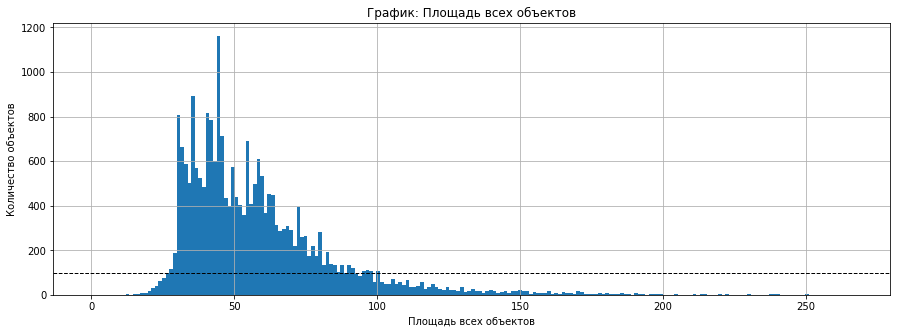

In [71]:
data['total_area'].hist(bins=200,figsize=(15,5))
plt.axline((0,100),(100,100), color='k', linestyle='dashed', linewidth=1)
tt = 'Площадь всех объектов'; plt.title('График: '+tt); plt.ylabel('Количество объектов'); plt.xlabel(tt);

**Как мы видим, большая часть квартир с площадью 25-100 метров квадратных.**

Незначительная часть это недвижимость с площадями от 100 до 175 м.кв. Недвижимость до 25 и более 175 м.кв.скорее редкость.

#### жилая площадь
- *living_area* — жилая площадь в квадратных метрах (м²)

In [72]:
min = data['living_area'].min()
max = data['living_area'].max()
print(f'Минимальная площадь {min}м.кв., Максимальная {max}.')

Минимальная площадь 6.0м.кв., Максимальная 175.0.


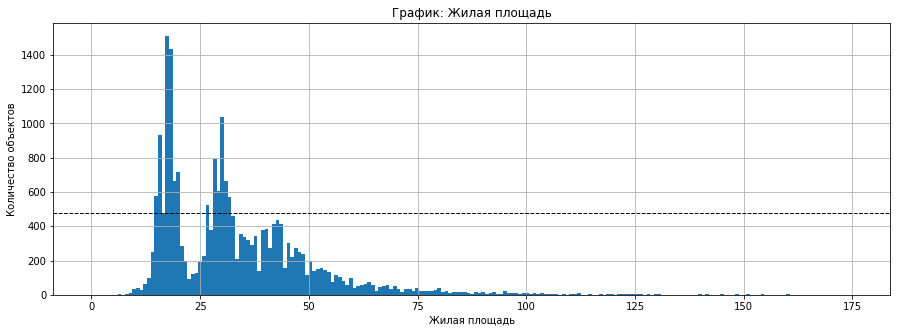

In [73]:
data['living_area'].hist(bins=200,figsize=(15,5))
plt.axline((0,480),(1,480), color='k', linestyle='dashed', linewidth=1);
tt = 'Жилая площадь';plt.title('График: '+tt);plt.ylabel('Количество объектов'); plt.xlabel(tt);

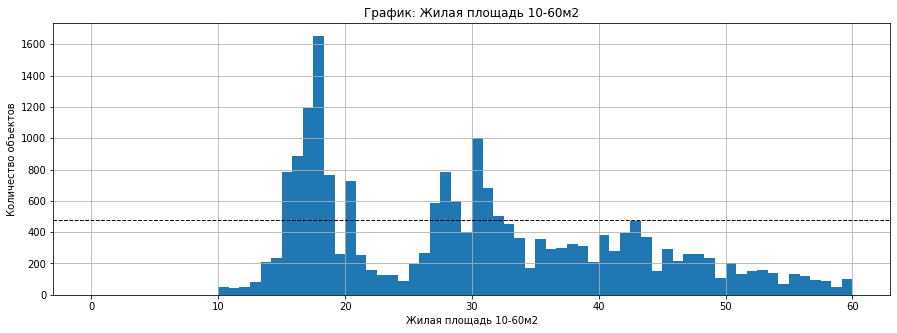

In [74]:
data['living_area'].hist(bins=60,figsize=(15,5),range=(10,60))
plt.axline((0,480),(1,480), color='k', linestyle='dashed', linewidth=1)
tt = 'Жилая площадь 10-60м2'; plt.title('График: '+tt); plt.ylabel('Количество объектов'); plt.xlabel(tt);

**Как мы видим, большая часть квартир с жилой площадью 17-21 и 28-34 метров квадратных.**

Жилая площадь - это спальни, гостиные и т.п., не включая кухни, коридоры, балконы и т.п. График имеет два пика: жилая площадь около 20 м.кв. и 25-30 м.кв., далее идет спад примерно в три раза и уровень жилой площади в объектах недвижимости держится на уровне 35-50 м.кв.

#### площадь кухни
- *kitchen_area* — площадь кухни в квадратных метрах (м²)

In [75]:
min = data['kitchen_area'].min()
max = data['kitchen_area'].max()
print(f'Минимальная площадь кухни {min}м.кв., Максимальная {max}.')

Минимальная площадь кухни 1.3м.кв., Максимальная 100.7.


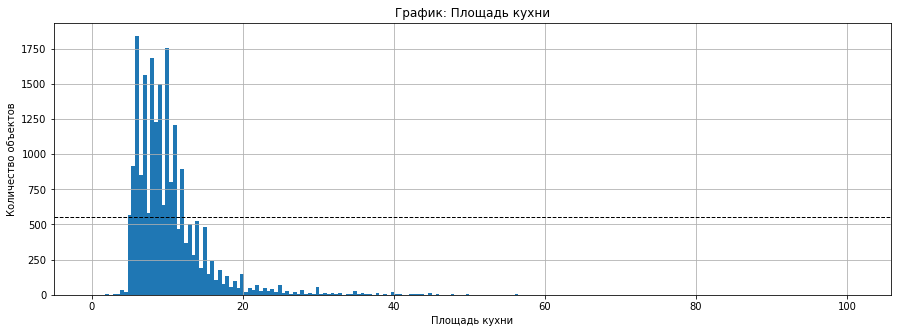

In [76]:
data['kitchen_area'].hist(bins=200,figsize=(15,5))
plt.axline((0,550),(1,550), color='k', linestyle='dashed', linewidth=1)
tt = 'Площадь кухни'; plt.title('График: '+tt); plt.ylabel('Количество объектов'); plt.xlabel(tt);

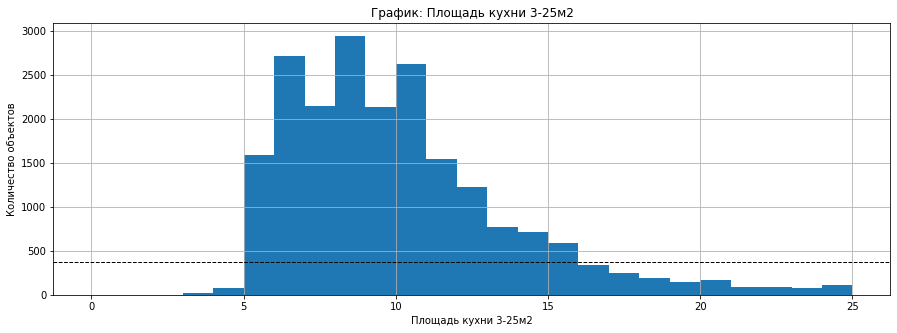

In [77]:
data['kitchen_area'].hist(bins=22,range=(3,25),figsize=(15,5))
plt.axline((0,370),(1,370), color='k', linestyle='dashed', linewidth=1)
tt = 'Площадь кухни 3-25м2'; plt.title('График: '+tt); plt.ylabel('Количество объектов'); plt.xlabel(tt);

**Как мы видим, большая часть квартир с площадью кухни 5-15 метров квадратных.**

Из графика видим, что  пик приходится на значение 8 м.кв., в основном кухни имеют площадь от 5 до 11 кв.м., и чуть меньше от 11 до 15 кв.м. Далее идет спад. Кухни "нестандартных" площадей 1-5 кв.м.(или возможно это части жилых помещений студий) и кухни более 15-15 кв.м. занимают не более 10% от всех кухонь.

#### цена объекта
- *last_price* — цена на момент снятия с публикации

In [78]:
min = data['last_price'].min()
max = data['last_price'].max()
print(f'Минимальная цена {min}, Максимальная {max}.')

Минимальная цена 12190.0, Максимальная 48000000.0.


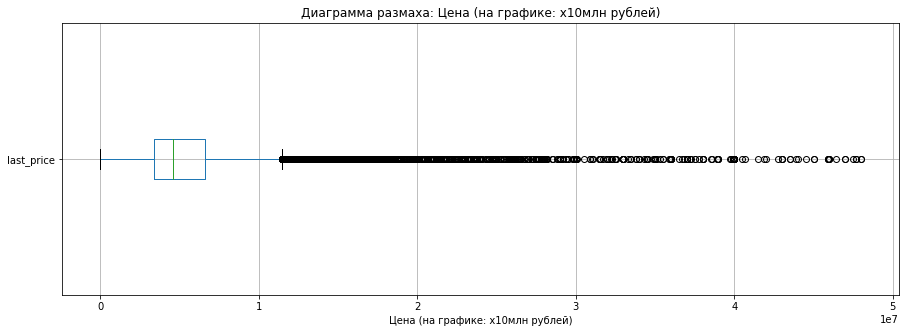

In [79]:
data.boxplot(column=['last_price'], vert=False, figsize=(15,5)) # тут мы видим только что выбросов много, но они вроде без ошибок, их нельзя убрать
tt = 'Цена (на графике: х10млн рублей)'; plt.title('Диаграмма размаха: '+tt); plt.xlabel(tt);

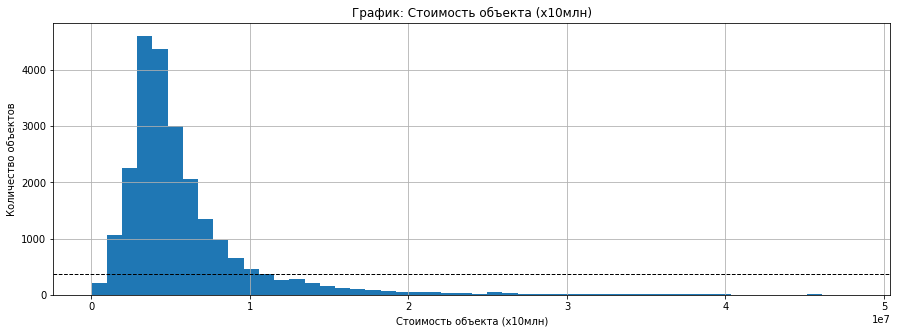

In [80]:
data['last_price'].hist(bins=50,figsize=(15,5))
plt.axline((0,370),(1,370), color='k', linestyle='dashed', linewidth=1)
tt = 'Стоимость объекта (х10млн)'; plt.title('График: '+tt); plt.ylabel('Количество объектов'); plt.xlabel(tt);

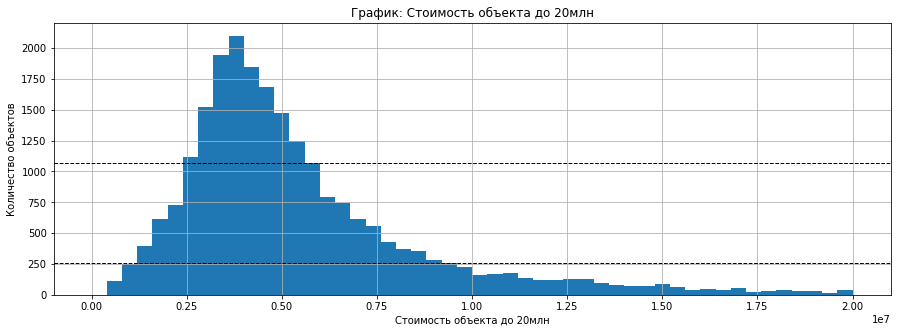

In [81]:
data['last_price'].hist(bins=50,range=(0,20000000),figsize=(15,5))
plt.axline((0,260),(1,260), color='k', linestyle='dashed', linewidth=1)
plt.axline((0,1070),(1,1070), color='k', linestyle='dashed', linewidth=1)
tt = 'Стоимость объекта до 20млн'; plt.title('График: '+tt); plt.ylabel('Количество объектов'); plt.xlabel(tt);

**Как мы видим, большая часть квартир стоит в пределах 1-10 млн рублей.**

Максимум цен приходится на 2.5-6 млн. Гистограмма имеет вид нормального распределения. Объектов стоимостью до 2.5млн так же мало как и от 6 до 12.5млн, а свыше 12.5млн идет спад и таких случае очень мало.

#### количество комнат
- *rooms* — число комнат

In [82]:
min = data['rooms'].min()
max = data['rooms'].max()
zero_rooms = data.loc[data['rooms']==0].shape[0]
print(f'Комнат бывает от {min} (всего {zero_rooms}) до {max}.')
k1 = data.query('rooms==1')['rooms'].count()/data.shape[0]*100
print(f'1-комнатные: {k1:.2f}%')
k2 = data.query('rooms==2')['rooms'].count()/data.shape[0]*100
print(f'2-комнатные: {k2:.2f}%')
k3 = data.query('rooms==3')['rooms'].count()/data.shape[0]*100
print(f'3-комнатные: {k3:.2f}%')

Комнат бывает от 0 (всего 189) до 5.
1-комнатные: 34.44%
2-комнатные: 33.92%
3-комнатные: 24.73%


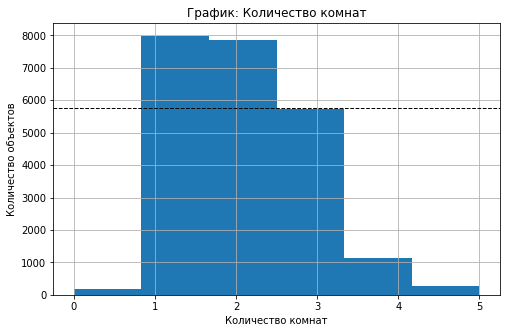

In [83]:
data['rooms'].hist(bins=6,figsize=(8,5))
plt.axline((0,5750),(1,5750), color='k', linestyle='dashed', linewidth=1)
tt = 'Количество комнат'; plt.title('График: '+tt); plt.ylabel('Количество объектов'); plt.xlabel(tt);

**Как мы видим, большая часть квартир с 1-комнатные (34.4%), 2-комнатные (33.9%) квартиры, менее частые 3-комнатные (24.7% выборки). Четырехкомнатные, пятикомнатные и объекты без комнат <7% выборки.**

#### высота потолков
- *ceiling_height* — высота потолков (м)

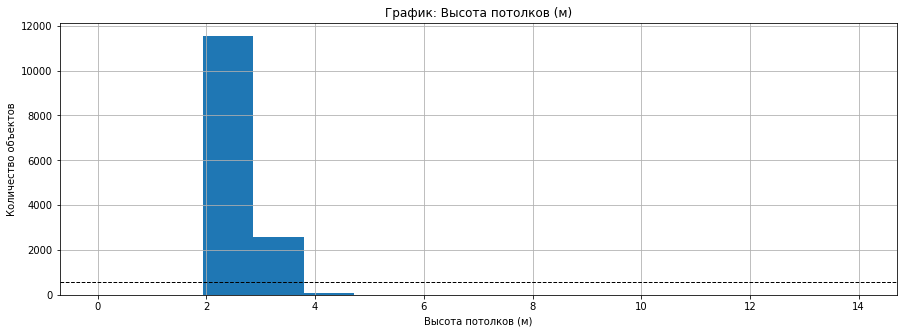

In [84]:
data['ceiling_height'].hist(bins=14,figsize=(15,5))
plt.axline((0,550),(1,550), color='k', linestyle='dashed', linewidth=1)
tt = 'Высота потолков (м)'; plt.title('График: '+tt); plt.ylabel('Количество объектов'); plt.xlabel(tt);

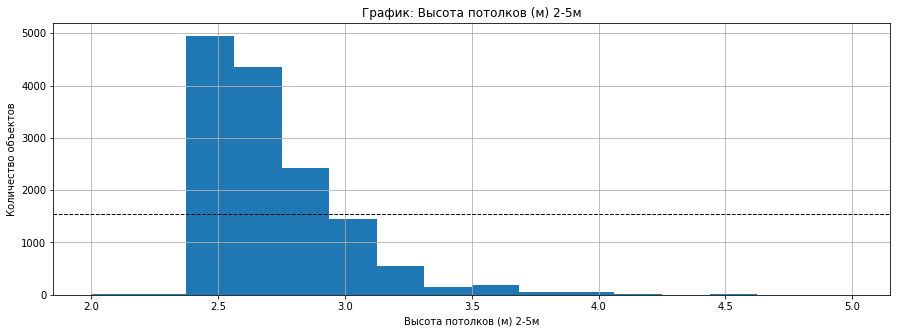

In [85]:
data['ceiling_height'].hist(bins=16,range=(2,5),figsize=(15,5))
plt.axline((2,1550),(5,1550), color='k', linestyle='dashed', linewidth=1)
tt = 'Высота потолков (м) 2-5м'; plt.title('График: '+tt); plt.ylabel('Количество объектов'); plt.xlabel(tt);

In [86]:
kp = data.query('~ceiling_height.isna()')['ceiling_height'].count()/data.shape[0]*100
k1 = data.query('2.5<=ceiling_height<3')['ceiling_height'].count()/data.query('ceiling_height>0')['ceiling_height'].count()*100
k2 = data.query('3<=ceiling_height<4')['ceiling_height'].count()/data.query('ceiling_height>0')['ceiling_height'].count()*100
print('Как мы видим,')
print(f'- потолки указаны лишь в {kp:.2f}% объектов;')
print(f'- большая часть ({k1:.2f}%) квартир с высотой потолков 2.5 - 3 метра;')
print(f'- у {k2:.2f}% объектов высота потолка от 3 до 4 метров.')

Как мы видим,
- потолки указаны лишь в 61.41% объектов;
- большая часть (82.43%) квартир с высотой потолков 2.5 - 3 метра;
- у 16.54% объектов высота потолка от 3 до 4 метров.


#### этаж квартиры
- *floor* — этаж

In [87]:
min = data['floor'].min()
max = data['floor'].max()
print(f'Объекты на этажах от {min} до {max}.')

Объекты на этажах от 1 до 27.


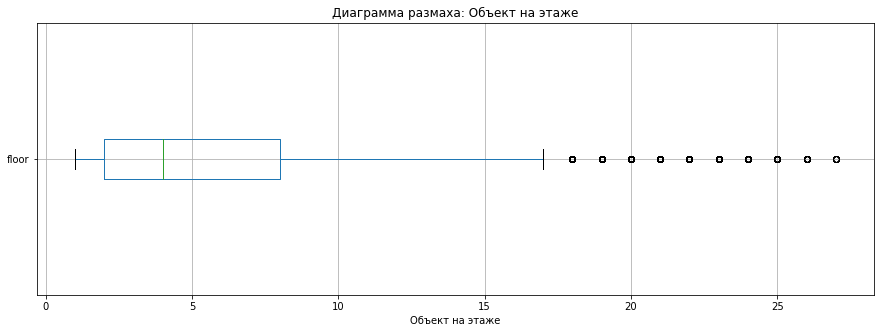

In [88]:
data.boxplot(column=['floor'], vert=False, figsize=(15,5))
tt = 'Объект на этаже'; plt.title('Диаграмма размаха: '+tt); plt.xlabel(tt);

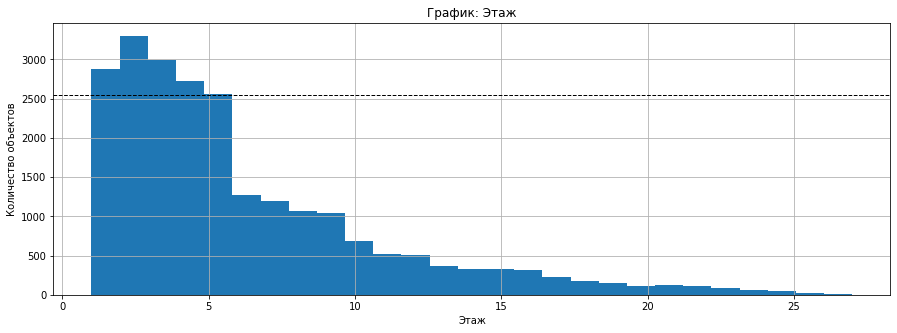

In [89]:
data['floor'].hist(bins=27,figsize=(15,5))
plt.axline((2,2550),(3,2550), color='k', linestyle='dashed', linewidth=1)
tt = 'Этаж'; plt.title('График: '+tt); plt.ylabel('Количество объектов'); plt.xlabel(tt);

In [90]:
k1 = data.query('1<=floor<=5')['floor'].count()/data.query('floor>0')['floor'].count()*100
print(f'Этаж 1-5: {k1}%')
k2 = data.query('6<=floor<=10')['floor'].count()/data.query('floor>0')['floor'].count()*100
print(f'Этаж 6-10: {k2}%')
print()
print(f'Как мы видим, большая часть ({k1:.2f}%) квартир на 1-5 этаже, среди них больше всего квартир на 2, 3 и 1 этажах, - квартиры на 6-10 этажах занимают еще {k2:.2f}% выборки.')

Этаж 1-5: 62.41104162173819%
Этаж 6-10: 22.613758895837826%

Как мы видим, большая часть (62.41%) квартир на 1-5 этаже, среди них больше всего квартир на 2, 3 и 1 этажах, - квартиры на 6-10 этажах занимают еще 22.61% выборки.


#### тип этажа квартиры
- *floor_type* — тип этажа квартиры («первый», «последний», «один», «другой»)

Другой: 73.569117964201%
Первый: 12.322622385162822%
Последний: 14.000431313349148%


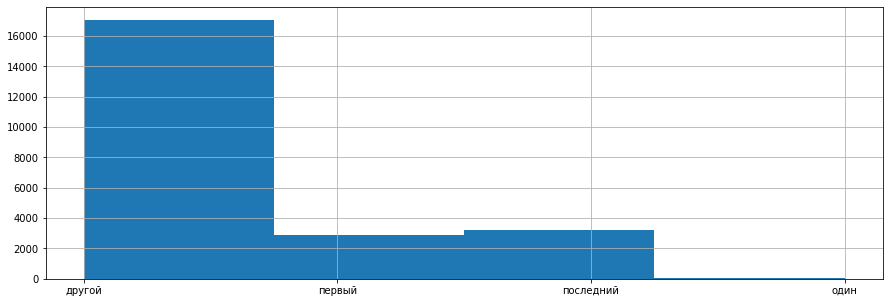

In [91]:
data['floor_type'].hist(bins=4,figsize=(15,5));
k1 = data.query('floor_type=="другой"')['floor_type'].count()/data.query('~floor_type.isna()')['floor_type'].count()*100
print(f'Другой: {k1}%')
k2 = data.query('floor_type=="первый"')['floor_type'].count()/data.query('~floor_type.isna()')['floor_type'].count()*100
print(f'Первый: {k2}%')
k3 = data.query('floor_type=="последний"')['floor_type'].count()/data.query('~floor_type.isna()')['floor_type'].count()*100
print(f'Последний: {k3}%')

In [92]:
print('Как мы видим,')
print(f'- больше всего квартир не на первом или последнем ({k1:.2f}%);')
print(f'- объектов на последних этажах немного больше ({k3:.2f}% против {k2:.2f}%), чем на первых;')
print(f'- есть малое кол-во одноэтажных объектов.')

Как мы видим,
- больше всего квартир не на первом или последнем (73.57%);
- объектов на последних этажах немного больше (14.00% против 12.32%), чем на первых;
- есть малое кол-во одноэтажных объектов.


#### общее количество этажей в доме
- *floors_total* — всего этажей в доме

In [93]:
min = data['floors_total'].min()
max = data['floors_total'].max()
print(f'Этажей от {min} до {max}.')

k1 = data.query('floors_total==5')['floors_total'].count()/data.query('floors_total>0')['floor_type'].count()*100
print(f'5-ти этажные дома: {k1}%')
k2 = data.query('floors_total==9')['floors_total'].count()/data.query('floors_total>0')['floor_type'].count()*100
print(f'9-ти этажные дома: {k2}%')

Этажей от 1 до 27.
5-ти этажные дома: 24.524477032564157%
9-ти этажные дома: 16.131119258141037%


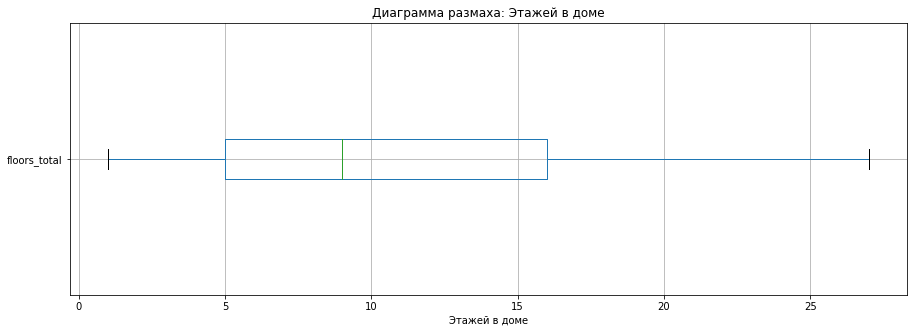

In [94]:
data.boxplot(column=['floors_total'], vert=False, figsize=(15,5))
tt = 'Этажей в доме'; plt.title('Диаграмма размаха: '+tt); plt.xlabel(tt);

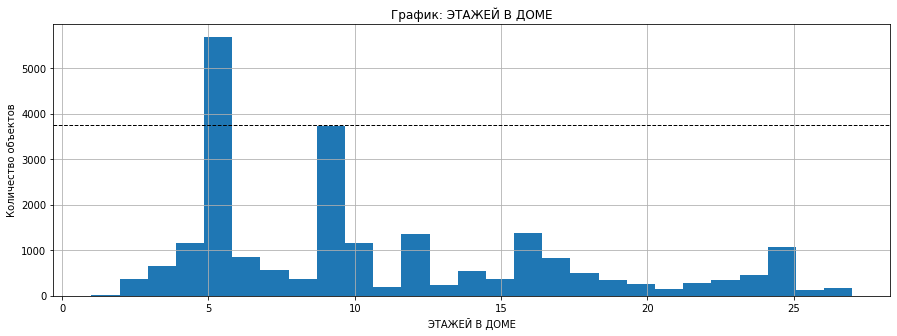

In [95]:
data['floors_total'].hist(bins=27,figsize=(15,5),range=(1,27))
plt.axline((2,3750),(3,3750), color='k', linestyle='dashed', linewidth=1)
tt = 'ЭТАЖЕЙ В ДОМЕ'; plt.title('График: '+tt); plt.ylabel('Количество объектов'); plt.xlabel(tt);

**Как мы видим,**
- больше всего (24.5%) пятиэтажек;
- на втором месте девятиэтажные дома (16.1%);
- далее по количеству объектов идут 12, 16 и 25-ти этажные дома.

In [96]:
print('Как мы видим,')
print(f'- больше всего ({k1:.2f}%) пятиэтажек;')
print(f'- на втором месте девятиэтажные дома ({k2:.2f}%);')
print(f'- далее по количеству объектов идут 12, 16 и 25-ти этажные дома.')

Как мы видим,
- больше всего (24.52%) пятиэтажек;
- на втором месте девятиэтажные дома (16.13%);
- далее по количеству объектов идут 12, 16 и 25-ти этажные дома.


#### расстояние до центра города в метрах
- *cityCenters_nearest*

In [97]:
min = data['cityCenters_nearest'].min()
max = data['cityCenters_nearest'].max()/1000
print(f'Расстояние до центра от {min} метров до {max} км.')

Расстояние до центра от 181.0 метров до 65.968 км.


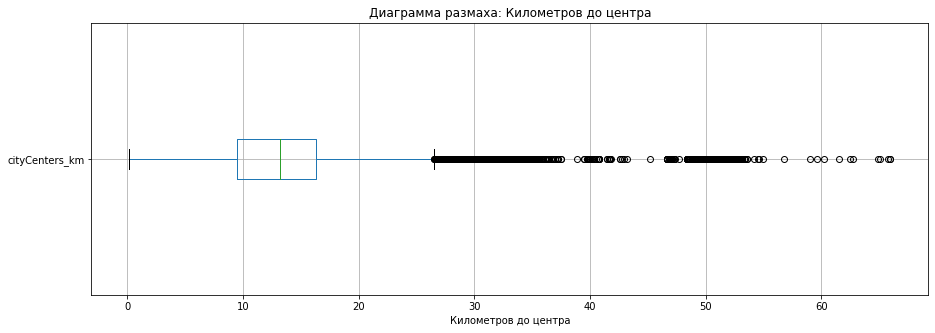

In [98]:
data.boxplot(column=['cityCenters_km'], vert=False, figsize=(15,5))
tt = 'Километров до центра'; plt.title('Диаграмма размаха: '+tt); plt.xlabel(tt);

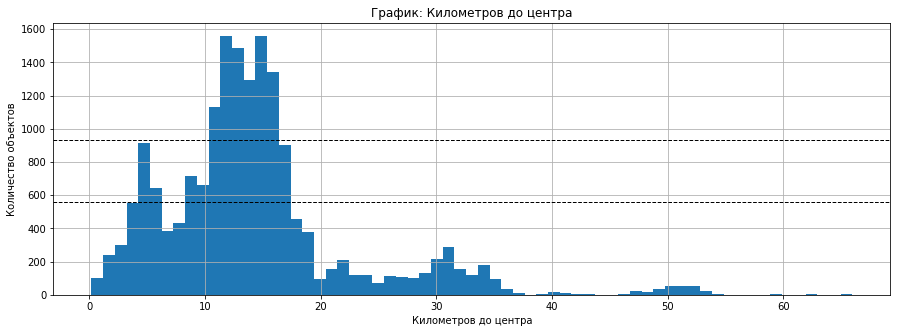

In [99]:
data['cityCenters_km'].hist(bins=65,figsize=(15,5))
plt.axline((30,930),(40,930), color='k', linestyle='dashed', linewidth=1)
plt.axline((30,560),(40,560), color='k', linestyle='dashed', linewidth=1)
tt = 'Километров до центра'; plt.title('График: '+tt); plt.ylabel('Количество объектов'); plt.xlabel(tt);

**Как мы видим, большая часть квартир находится в пределах 3-20 км от центра.**

**Есть два пика на графике:**
- малый пик приходится на квартиры в центре (4-6 км от центра);
- большой пик приходится на квартиры в спальных районах на расстоянии 11-17 км от центра.

Есть небольшие подъемы на графике объектов на расстоянии 30 км и 50 км от центра - это самая ближайшая окраина и пригороды.

#### расстояние до ближайшего аэропорта
- *airports_nearest* — расстояние до ближайшего аэропорта в метрах (м)

In [100]:
min = data.loc[data['airports_nearest']>0]['airports_nearest'].min()/1000
max = data['airports_nearest'].max()/1000
print(f'Расстояние до аэропорта от {min} до {max} км.')

Расстояние до аэропорта от 6.45 до 84.869 км.


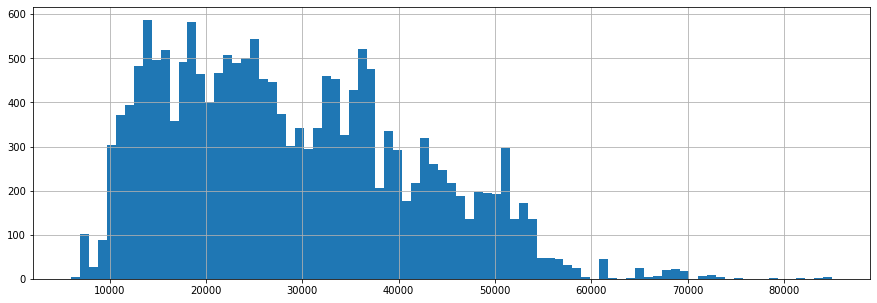

In [101]:
data['airports_nearest'].hist(bins=round(max),figsize=(15,5),range=(round(min)*1000,round(max)*1000));

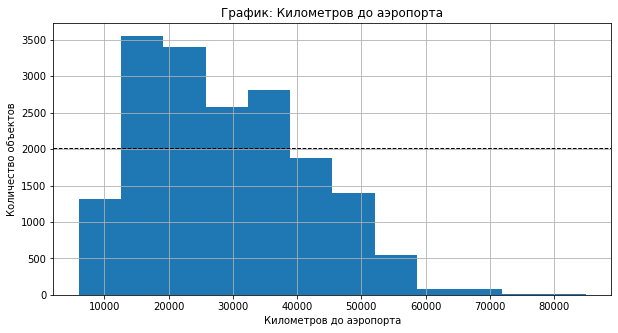

In [102]:
data['airports_nearest'].hist(bins=12,figsize=(10,5),range=(round(min)*1000,round(max)*1000))
plt.axline((6000,2020),(6040,2020), color='k', linestyle='dashed', linewidth=1)
tt = 'Километров до аэропорта'; plt.title('График: '+tt); plt.ylabel('Количество объектов'); plt.xlabel(tt);

**Как мы видим,**
- большая часть квартир находится не ближе 11км от аэропорта;
- пики приходятся на расстояния 13-16км, 17-18км, 19км ,21-23км и 33-36км от аэропорта;
- можно сказать, что подавляющее большинство объектов находятся на расстоянии 13-24км и 33-36км от аэропорта.

#### расстояние до ближайшего парка
- *parks_nearest* — расстояние до ближайшего парка (м)

In [103]:
min = data['parks_nearest'].min()
max = data['parks_nearest'].max()
print(f'Расстояние до парка от {min} до {max} м.')

Расстояние до парка от 1.0 до 3190.0 м.


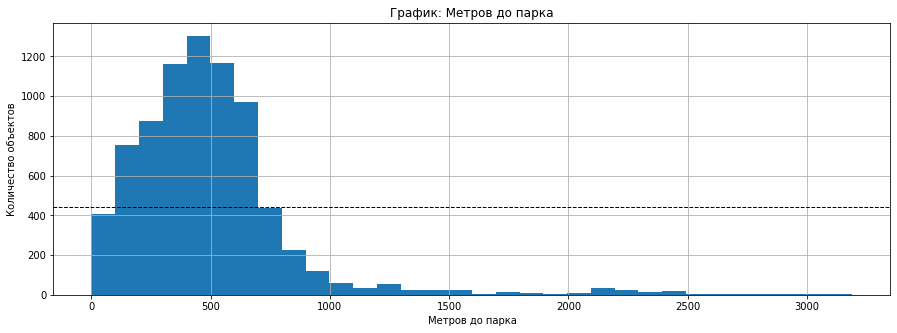

In [104]:
data['parks_nearest'].hist(bins=32,figsize=(15,5))
plt.axline((1,440),(2,440), color='k', linestyle='dashed', linewidth=1)
tt = 'Метров до парка'; plt.title('График: '+tt); plt.ylabel('Количество объектов'); plt.xlabel(tt);

**Как мы видим, в большинстве случаев парк находится в пределах 200-700 метров от квартиры.<br/>Пик приходится на объекты с расстоянием до парка 500 +-100 метров.**

#### день и месяц публикации объявления
- *pub_weekday* - день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- *pub_month* - месяц публикации объявления (1 - январь ...)

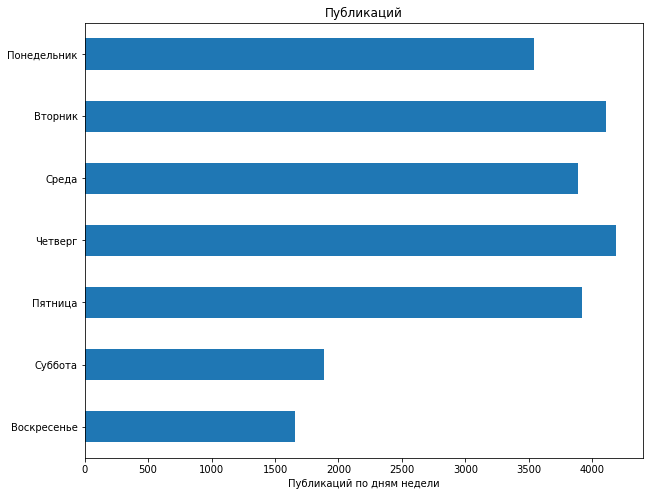

In [105]:
ax = data['pub_weekday'].value_counts().sort_index().plot(kind='barh',figsize=(10,8),title="Публикаций")
ax.set_xlabel("Публикаций по дням недели")
ax.set_yticklabels(['Понедельник','Вторник','Среда','Четверг','Пятница','Суббота','Воскресенье'])
ax.invert_yaxis()
plt.show()

**Как мы видим,**
- основные пики значений публикаций в будние дни, на выходных в два раза меньше.
- реже всего в будние дни публикаций в понедельник, больше всего в четверг.

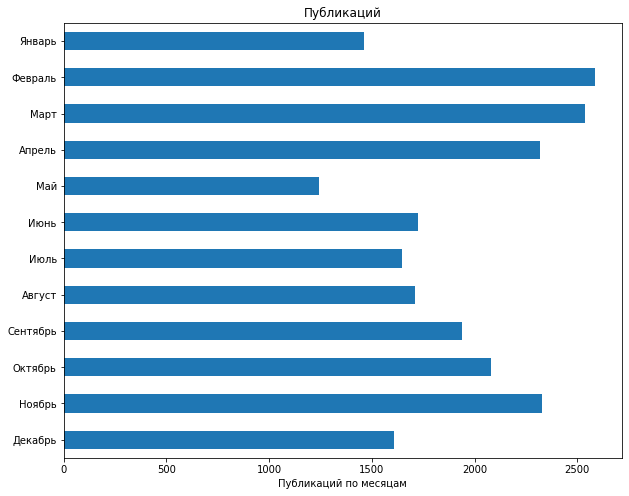

In [106]:
ax = data['pub_month'].value_counts().sort_index().plot(kind='barh',figsize=(10,8),title="Публикаций")
ax.set_xlabel("Публикаций по месяцам")
ax.set_yticklabels(['Январь','Февраль','Март','Апрель','Май','Июнь','Июль','Август','Сентябрь','Октябрь','Ноябрь','Декабрь'])
ax.invert_yaxis()
plt.show()

**Как мы видим,**
- основные пики значений публикаций в феврале (больше всего), марте, апреле и ноябре;
- меньше всего объявлений размещают в мае.

**Параметры объектов изучены.**

### Как быстро продавались квартиры

Изучим, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.

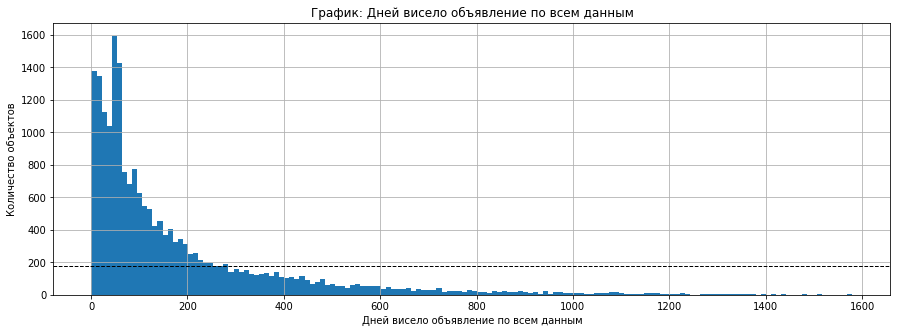

In [107]:
data['days_exposition'].hist(figsize=(15,5), bins=150)
plt.axline((130,data['days_exposition'].mean()),(240,data['days_exposition'].mean()), color='k', linestyle='dashed', linewidth=1)
tt = 'Дней висело объявление по всем данным'; plt.title('График: '+tt); plt.ylabel('Количество объектов'); plt.xlabel(tt);

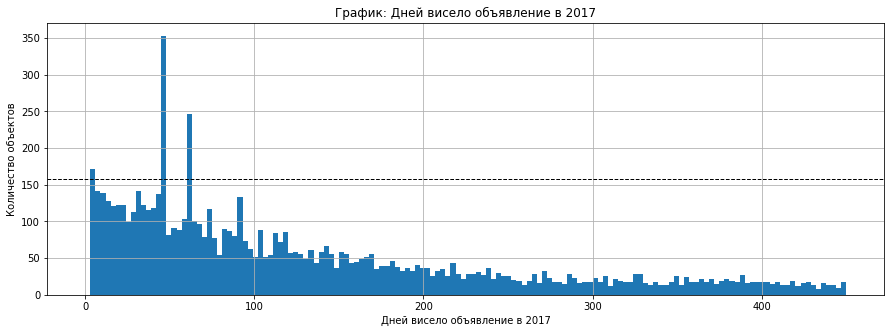

In [108]:
data.query('pub_year==2017')['days_exposition'].hist(figsize=(15,5), bins=150,range=(0,450))
plt.axline((130,data.query('pub_year==2017')['days_exposition'].mean()),(240,data.query('pub_year==2017')['days_exposition'].mean()), color='k', linestyle='dashed', linewidth=1)
tt = 'Дней висело объявление в 2017'; plt.title('График: '+tt); plt.ylabel('Количество объектов'); plt.xlabel(tt);

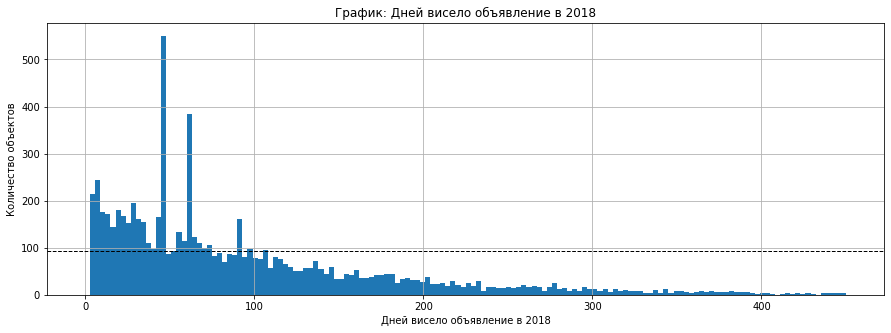

In [109]:
data.query('pub_year==2018')['days_exposition'].hist(figsize=(15,5), bins=150,range=(0,450))
plt.axline((130,data.query('pub_year==2018')['days_exposition'].mean()),(240,data.query('pub_year==2018')['days_exposition'].mean()), color='k', linestyle='dashed', linewidth=1)
tt = 'Дней висело объявление в 2018'; plt.title('График: '+tt); plt.ylabel('Количество объектов'); plt.xlabel(tt);

In [110]:
data['days_exposition'].describe() # среднее, медиана и тд

count             20112.0
mean    179.4160202863962
std     218.6757296617278
min                   1.0
25%     45.00000000000001
50%                  95.0
75%                 229.0
max                1580.0
Name: days_exposition, dtype: float64

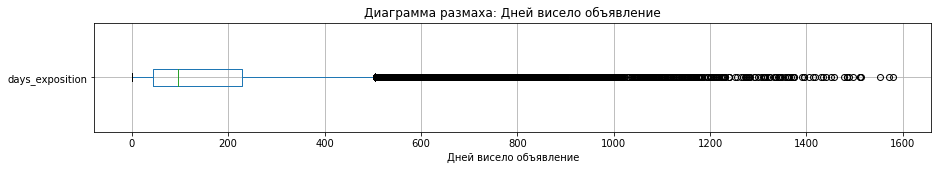

In [111]:
data[['days_exposition']].boxplot(vert = False, figsize=(15,2))
tt = 'Дней висело объявление'; plt.title('Диаграмма размаха: '+tt); plt.xlabel(tt);

In [112]:
data['days_exposition'].value_counts().to_frame().head(8)

,days_exposition
45.00000000000001,875
60.0,537
7.0,232
30.0,206
90.00000000000001,185
4.0,174
3.0000000000000004,156
5.0,149


**Сколько обычно занимает продажа?**

Из гистограммы и результатов метода describe видим, что в среднем объявление о продаже размещается в течение 180 дней. Но это значение может быть искажено некоторыми крайними максимальными (в 4 с лишним года) и минимальными значениями (в 1 день).

Разброс количества дней размещения объявления находится от 45 (1.5 месяца) до 229 дней (7.5 месяцев). Значение медианы в 3 месяца (95 дней) показывает, что это более вероятный срок размещения объявления, т.к. ровно половина объявлений размещается на этот срок и меньше, и ровно половина на этот срок и более. Даже учитывая, что не все строки с количеством дней заполнены, этих данных достаточно, чтобы получить представление о сроке продаже квартиры в Санкт-Петербурге. 

По графику размаха можно охватить диапазон нормальных значений для этого параметра: от 1 дня до 500 дней (примерно). 

**Какие продажи можно считать быстрыми, а какие — необычно долгими?**

Сроки размещения объявлений вне предела 1-500дней говорят о каких-либо нюансах или специфических характеристиках продаваемого объекта недвижимости, которые таким образом влияют на скорость его продажи.

Быстрыми продажами можно называть срок, приходящийся на 25-й квантиль -  до 1,5 месяцев, а необычайно долгими срок, приходящийся на 75-й квантиль - от 7,5 месяцев.

Посмотрев на моду (частотность), видим самый частый срок размещения - 45 дней. Дальше - 60 дней, 7, 30, 90. Я думаю это связано с правилами сроков публикации на Яндекс.Недвижимости. То есть тут скорее имеем дело с тем, что объявление снималось с публикации, но не факт же что сделка осуществлялась.

**Еще интересно посмотреть на статистику по годам:**

In [113]:
print('Макс. месяц в 2019 году:',data.query('pub_year==2019')['pub_month'].max())

Макс. месяц в 2019 году: 5


Количество сделок в год


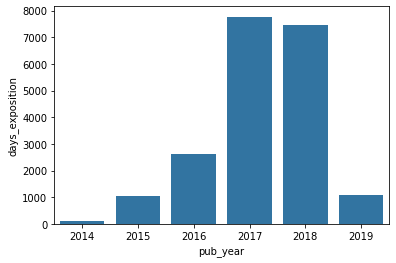

In [114]:
df_2 = data.groupby('pub_year').count();df_2.reset_index(inplace=True);
sns.barplot(x='pub_year', y='days_exposition', data=df_2, color='#1f77b4');print('Количество сделок в год');

Как долго (дней) висели объявления в разные годы?


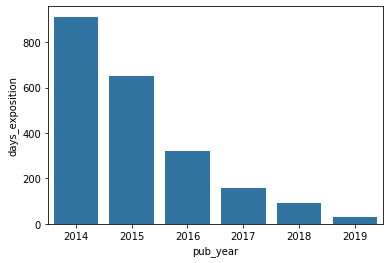

In [115]:
df_by_year_mean = data.groupby('pub_year').mean();df_by_year_mean.reset_index(inplace=True);
sns.barplot(x='pub_year', y='days_exposition', data=df_by_year_mean, color='#1f77b4');print('Как долго (дней) висели объявления в разные годы?');

In [116]:
df_by_year_mean['days_exposition']

0    912.2631578947369
1    651.6632173095014
2    321.9060606060606
3    158.1445488479856
4    93.91189486388627
5   30.814780168381667
Name: days_exposition, dtype: float64

**Как видно с 2014 года количество объявлений увеличивается<br/>(в 2018 чуть меьньше чем в 2017, а 2019 год только до мая есть данные),<br/>а среднее время публикации уменьшается (с 912 дней в 2014 до 31 дня в 2019).**

### Факторы, которые больше всего влияют на общую (полную) стоимость объекта

Построим графики, которые покажут зависимость цены от указанных ниже параметров.

Для подготовки данных перед визуализацией будем использовать сводные таблицы.
        

In [117]:
# делаем сводную таблицу, и цену приводим в понятный формат (тыс рублей)
df = data.copy()
df['last_price'] = (df['last_price'] / 1000).astype(int)
df = df[[
    'last_price',
    'total_area', 'living_area', 'kitchen_area',
    'rooms', 'floor_type',
    'pub_year', 'pub_month', 'pub_weekday']]
print('Сводная таблица:'); display(df)
print('Статистика данных:'); display(df.describe().astype(int))
print('Квантили:'); do_quant(df,df.columns)

Сводная таблица:


,last_price,total_area,living_area,kitchen_area,rooms,floor_type,pub_year,pub_month,pub_weekday
0,13000,108.0,51.0,25.0,3,другой,2019,3,3
1,3350,40.4,18.6,11.0,1,первый,2018,12,1
2,5196,56.0,34.3,8.3,2,другой,2015,8,3
3,10000,100.0,32.0,41.0,2,другой,2018,6,1
4,2890,30.4,14.4,9.1,1,другой,2018,9,0
...,...,...,...,...,...,...,...,...,...
23180,9700,133.81,73.3,13.83,3,другой,2017,3,1
23181,3100,59.0,38.0,8.5,3,другой,2018,1,0
23182,2500,56.7,29.7,NaN,2,первый,2018,2,6
23183,11475,76.75,43.18282436343383,23.3,2,другой,2017,3,1


Статистика данных:


,last_price,total_area,living_area,kitchen_area,rooms,pub_year,pub_month,pub_weekday
count,23185,23185,21788,21009,23185,23185,23185,23185
mean,5846,57,33,10,2,2017,6,2
std,4604,26,17,5,0,1,3,1
min,12,12,6,1,0,2014,1,0
25%,3400,40,18,7,1,2017,3,1
50%,4600,51,30,9,2,2017,6,3
75%,6630,68,42,11,3,2018,10,4
max,48000,266,175,100,5,2019,12,6


Квантили:


,last_price,total_area,living_area,kitchen_area,rooms,pub_year,pub_month,pub_weekday
0.01,"1,000.00",25.33,13.00,5.00,1.00,"2,015.00",1.00,0.00
0.25,"3,400.00",40.00,18.60,7.00,1.00,"2,017.00",3.00,1.00
0.5,"4,600.00",51.40,30.00,9.00,2.00,"2,017.00",6.00,3.00
0.75,"6,630.00",68.20,42.00,11.87,3.00,"2,018.00",10.00,4.00
0.9,"10,300.00",90.00,53.40,15.20,3.00,"2,019.00",11.00,5.00
0.9976,"37,999.36",198.32,121.00,44.82,5.00,"2,019.00",12.00,6.00


#### Общая площадь

**Зависимость общей (полной) стоимости объекта от общей площади**
- *total_area* — общая площадь квартиры в квадратных метрах (м²)

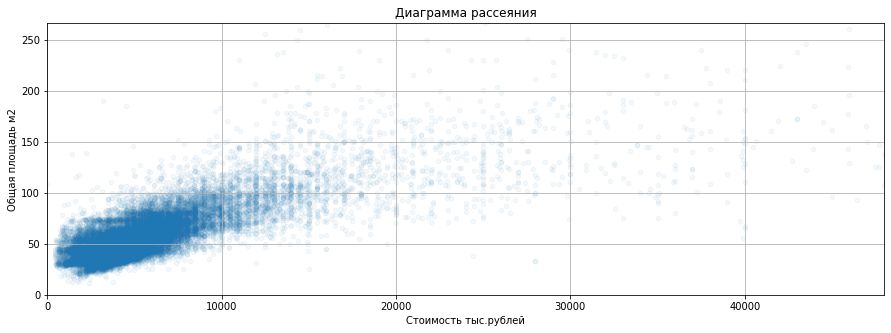

In [118]:
df.plot(x='last_price', y='total_area', kind='scatter', grid=True, alpha=0.05, figsize=(15,5),
        xlim=(0, df['last_price'].max()), ylim=(0, df['total_area'].max()))
tt = 'Диаграмма рассеяния'; plt.title(tt); plt.ylabel('Общая площадь м2'); plt.xlabel('Стоимость тыс.рублей');

In [119]:
_corr = df['last_price'].corr(df['total_area'])*100
print(f'Коэфф. корреляции цена : общая = {_corr:.2f}%')

Коэфф. корреляции цена : общая = 77.23%


**Есть явная линейная зависимость стоимости от общей площади помещения.**<br/>
Наибольшая плотность на площади до 100 м.кв. Далее значения рассеиваются и вероятно зависят и от других факторов. Например, от специфических свойств и характеристик продаваемой жилплощади.

#### Жилая площадь

**Зависимость общей (полной) стоимости объекта от жилой площади**
- *living_area* — жилая площадь в квадратных метрах (м²)

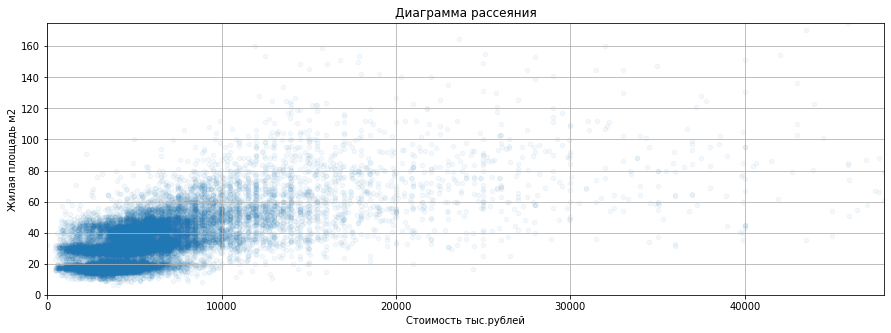

In [120]:
df.plot(x='last_price', y='living_area', kind='scatter', grid=True, alpha=0.05, figsize=(15,5),
        xlim=(0, df['last_price'].max()), ylim=(0, df['living_area'].max()))
tt = 'Диаграмма рассеяния'; plt.title(tt); plt.ylabel('Жилая площадь м2'); plt.xlabel('Стоимость тыс.рублей');

In [121]:
_corr = df['last_price'].corr(df['living_area'])*100
print(f'Коэфф. корреляции цена : жилая площадь = {_corr:.2f}%')

Коэфф. корреляции цена : жилая площадь = 66.40%


**Есть явная линейная зависимость стоимости от жилой площади помещения.**<br/>
В большинстве случаев общая площадь и жилая коррелируют между собой (больше квартира - больше жилая площадь).<br/>
Наибольшая плотность на площади до 50-60 м.кв. Далее значения рассеиваются и вероятно зависят и от других факторов.

#### Площадь кухни

**Зависимость общей (полной) стоимости объекта от площади кухни**
- *kitchen_area* — площадь кухни в квадратных метрах (м²)

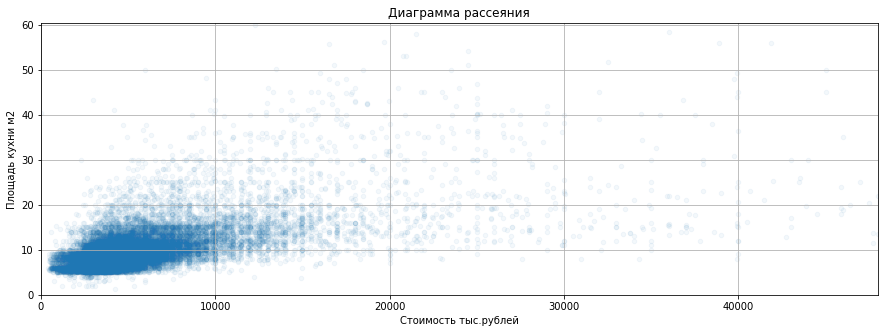

In [122]:
df.plot(x='last_price', y='kitchen_area', kind='scatter', grid=True, alpha=0.05, figsize=(15,5),
        xlim=(0, df['last_price'].max()), ylim=(0, df['kitchen_area'].max()*.6))
tt = 'Диаграмма рассеяния'; plt.title(tt); plt.ylabel('Площадь кухни м2'); plt.xlabel('Стоимость тыс.рублей');

In [123]:
_corr = df['last_price'].corr(df['kitchen_area'])*100
print(f'Коэфф. корреляции цена : площадь кухни = {_corr:.2f}%')

Коэфф. корреляции цена : площадь кухни = 59.07%


**Есть линейная зависимость стоимости от площади кухни.**<br/>
Видим менее выраженную линейную зависимость стоимости помещения от площади кухни. Это логично, потому что чем больше квартира, тем больше кухня, но не до бесконечности (например в 3-х и 5-ти комнатных квартирах кухни могут быть примерно одинакового метража) и метраж кухни уже перстает весомо влиять на стоимость.<br/>
Основная плотность значений в метраже до 18 м2.

#### Количество комнат

**Зависимость общей (полной) стоимости объекта от количество комнат**
- *rooms* — число комнат

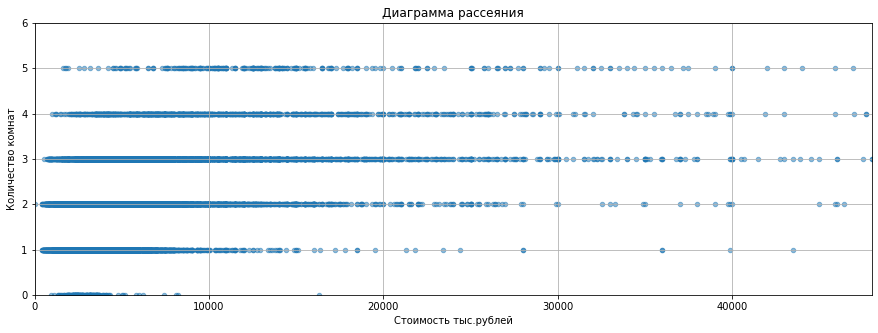

In [124]:
df.plot(x='last_price', y='rooms', kind='scatter', grid=True, alpha=0.5, figsize=(15,5),
        xlim=(0, df['last_price'].max()), ylim=(0, df['rooms'].max()+1))
tt = 'Диаграмма рассеяния'; plt.title(tt); plt.ylabel('Количество комнат'); plt.xlabel('Стоимость тыс.рублей');

**Есть зависимость стоимости от количества комнат.**<br/>
Мы видим, что чем больше количество комнат, тем:
- позже на шкале начинаются точки стоимости (минимальная стоимость);
- дальше по шкале распределяются точки стоимости (максимальная стоимость);

Построим график, чтобы убедиться.

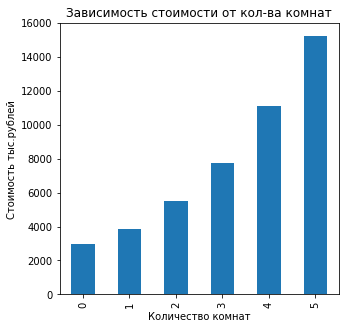

In [125]:
# построим график зависимости цены от количества комнат
df.groupby('rooms')['last_price'].agg(['count', 'mean'])['mean'].plot(kind='bar',figsize=(5, 5))
tt = 'Зависимость стоимости от кол-ва комнат'; plt.title(tt); plt.xlabel('Количество комнат'); plt.ylabel('Стоимость тыс.рублей');

**График подтверждает, что с увеличением кол-ва комнат увеличивается и стоимость помещения.**

#### Тип этажа

**Зависимость общей (полной) стоимости объекта от типа этажа, на котором расположена квартира**
- *floor_type* — тип этажа квартиры («первый», «последний», «один», «другой»)

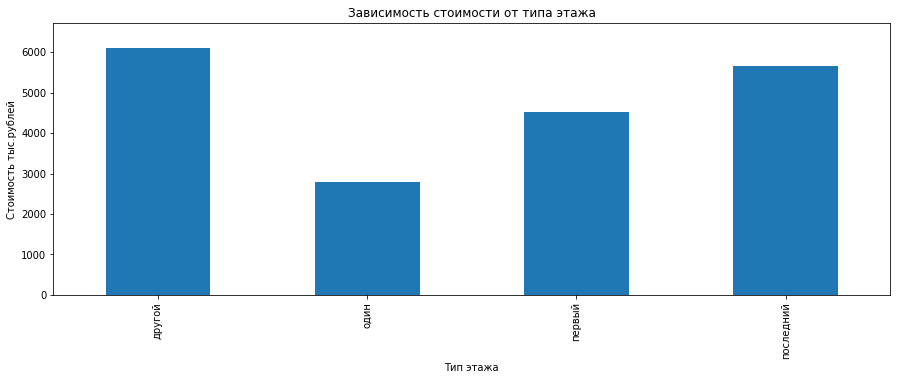

In [126]:
df.groupby('floor_type')['last_price'].agg(['count', 'mean'])['mean'].plot(
    kind='bar', figsize=(15, 5), ylim=(0, df.groupby('floor_type')['last_price'].agg(['count', 'mean'])['mean'].max()*1.1))
tt = 'Зависимость стоимости от типа этажа'; plt.title(tt); plt.xlabel('Тип этажа'); plt.ylabel('Стоимость тыс.рублей');

**Как мы видим,**
- провал средней стоимости помещений на первом этаже;
- примерно одинаковый подъем для средней стоимости на последнем и других этажах;
- средняя стоимость на других этажах немного выше;
- средняя стоимость одноэтажных объектов самая низкая.

#### Дата размещения

**Зависимость общей (полной) стоимости объекта от даты размещения (день недели, месяц, год)**
- *pub_weekday* - день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- *pub_month* - месяц публикации объявления (1 - январь ...)
- *pub_year* - год публикации объявления

Диаграмма рассеяния стоимости


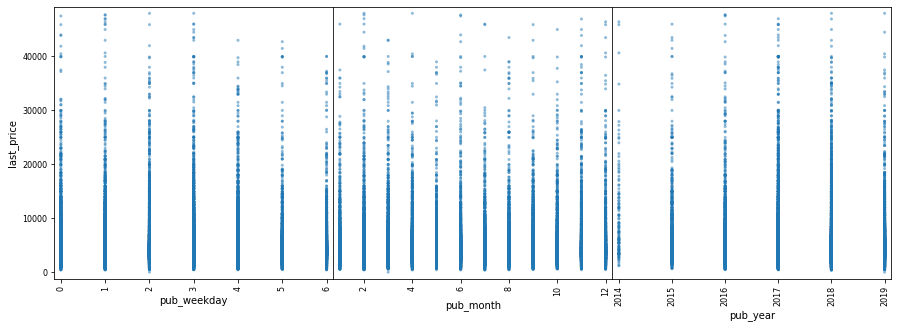

In [127]:
print('Диаграмма рассеяния стоимости');
axes = pd.plotting.scatter_matrix(
    df[['pub_weekday', 'pub_month', 'pub_year', 'last_price']], figsize=(20, 20));
for i in range(np.shape(axes)[0]):
    if i<np.shape(axes)[0]-1:
        for j in range(np.shape(axes)[1]):
            axes[i,j].set_visible(False)
    axes[np.shape(axes)[0]-1,np.shape(axes)[1]-1].set_visible(False);        

На графиках видно, что:
- от дня недели немного меняется верхняя граница максимальной стоимости, зависимости скорее всего нет;
- возможно есть зависимость от месяца публикации (плотность точек);
- скорее всего есть зависимость стоимости от года публикации объявления (плотность точек).

**Построим дополнительные графики чтобы убедиться в этом.**

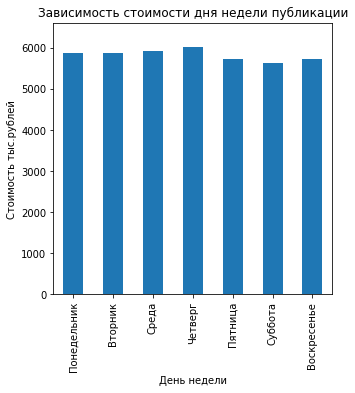

In [128]:
ax = df.groupby('pub_weekday')['last_price'].agg(['count', 'mean'])['mean'].plot(
    kind='bar', figsize=(5, 5), ylim=(0, df.groupby('pub_weekday')['last_price'].agg(['count', 'mean'])['mean'].max()*1.1));
ax.set_xticklabels(['Понедельник','Вторник','Среда','Четверг','Пятница','Суббота','Воскресенье']);
tt = 'Зависимость стоимости дня недели публикации'; plt.title(tt); plt.xlabel('День недели'); plt.ylabel('Стоимость тыс.рублей');

Зависимости практически нет, наблюдаем что средняя стоимость объектов, размещенных в разные дни недели практически одинакова.<br/>
Малый подъем средней стоимости наблюдается с понедельника по четверг, и спадает до воскресенья.

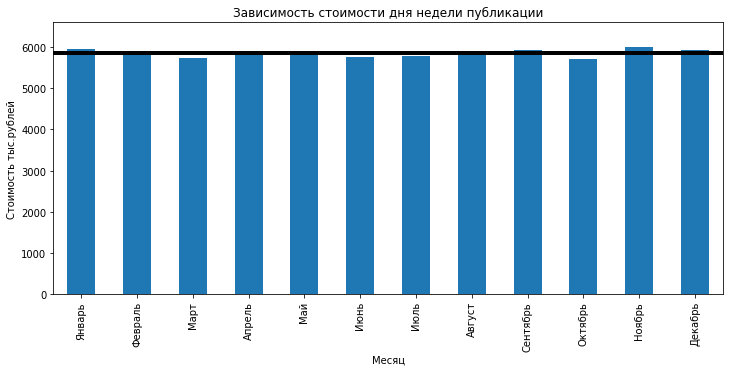

In [129]:
ax = df.groupby('pub_month')['last_price'].agg(['count', 'mean'])['mean'].plot(
    kind='bar', figsize=(12, 5), ylim=(0, df.groupby('pub_month')['last_price'].agg(['count', 'mean'])['mean'].max()*1.1));
ax.set_xticklabels(['Январь','Февраль','Март','Апрель','Май','Июнь','Июль','Август','Сентябрь','Октябрь','Ноябрь','Декабрь']);
mmax = df.groupby('pub_month')['last_price'].agg(['count', 'mean'])['mean'].max();
mmin = df.groupby('pub_month')['last_price'].agg(['count', 'mean'])['mean'].min();
plt.axline((0,(mmax+mmin)/2),(100,(mmax+mmin)/2), color='k', linewidth=4);
tt = 'Зависимость стоимости дня недели публикации'; plt.title(tt); plt.xlabel('Месяц'); plt.ylabel('Стоимость тыс.рублей');

Зависимости между средней стоимость опубликованных объектов и месяцем публикации не наблюдаем.<br/>
Есть провалы в марте, июне и октябре. Подъемы в январе и ноябре.

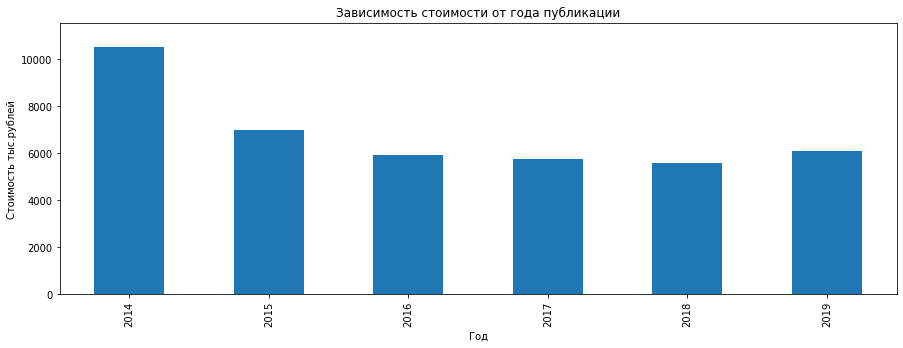

In [130]:
df.groupby('pub_year')['last_price'].agg(['count', 'mean'])['mean'].plot(
    kind='bar', figsize=(15, 5), ylim=(0, df.groupby('pub_year')['last_price'].agg(['count', 'mean'])['mean'].max()*1.1))
tt = 'Зависимость стоимости от года публикации'; plt.title(tt); plt.xlabel('Год'); plt.ylabel('Стоимость тыс.рублей');

**Из графика видно, что:**
- наибольшая средняя цена недвижимости была в 2014 году;
- с 2015 (довольно стремительно) до 2019 (меньше) средняя стоимость падает;
- в 2019 году заметен небольшой рост средней стоимости объекта.
    
Но, нужно учесть, что за 2014 год у нас мало данных (два месяца).<br/>
Посмотрим на график по годам и месяцам.

In [131]:
df['pub_month_z'] = df['pub_month'].astype(str).apply(lambda x: x.zfill(2))
df['pub_year_month'] = df.agg('{0[pub_year]}_{0[pub_month_z]}'.format, axis=1)

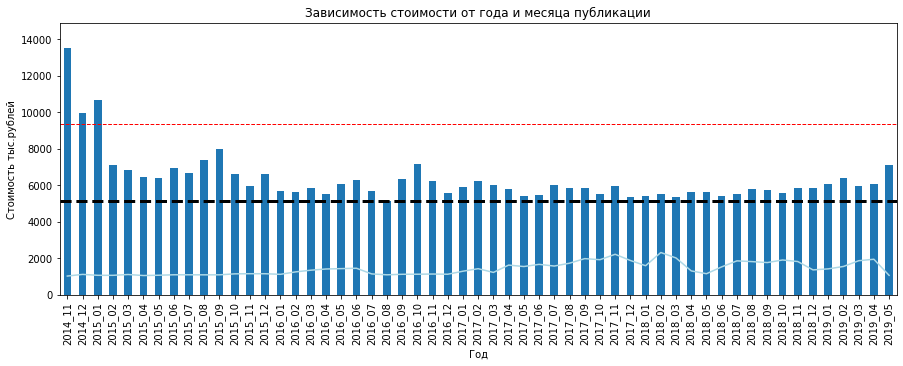

In [132]:
df2 = df.groupby('pub_year_month')['last_price'].agg(['count', 'mean'])['count']+1000; # для наглядности
df2.plot(kind='line',color='lightblue',figsize=(15, 5), ylim=(0, df.groupby('pub_year_month')['last_price'].agg(['count', 'mean'])['mean'].max()*1.1));
mmax = df.groupby('pub_year_month')['last_price'].agg(['count', 'mean'])['mean'].max();
mmin = df.groupby('pub_year_month')['last_price'].agg(['count', 'mean'])['mean'].min();
plt.axline((0,(mmax+mmin)/2),(100,(mmax+mmin)/2), color='r', linestyle='dashed', linewidth=1);
plt.axline((0,mmin),(100,mmin), color='k', linestyle='dashed', linewidth=3);
df.groupby('pub_year_month')['last_price'].agg(['count', 'mean'])['mean'].plot(
    kind='bar', figsize=(15, 5), ylim=(0, df.groupby('pub_year_month')['last_price'].agg(['count', 'mean'])['mean'].max()*1.1));
tt = 'Зависимость стоимости от года и месяца публикации'; plt.title(tt); plt.xlabel('Год'); plt.ylabel('Стоимость тыс.рублей');

Красной линией отмечено средняя стоимость по всем данным.<br/>
Голубой - количество объявлений опубликованных в этот месяц. *(+1000 для заметности на графике)*

**Выводы по зависимости стоимости объекта от года (и месяца) публикации:**
- линейной зависимости не найдено;
- средняя стоимость объектов падала с 2014 по 2018 год, в 2019 небольшой рост;
- высокая стоимость объектов в 2014 году вряд-ли связана с кол-вом объявлений в месяц.

### Населённые пункты с самой высокой и низкой стоимостью квадратного метра

Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.

Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра.

Эти данные можно найти по имени в столбце `locality_name`.

In [133]:
def get_top_ten_df(data=data):
    # на выходе датафрейм
    # берем индексы топ-10 по кол-ву объявлений
    top10 = data['locality_name'].value_counts().head(10).index
    # вытаскиваем
    top10_data = data.query('locality_name in @top10')
    # средняя стоимость за м2 по каждому населенному пункту
    top10__price_m2__mean = top10_data.groupby('locality_name')['price_m2'].mean().astype(int).sort_values(ascending=False)
    return top10__price_m2__mean.to_frame()

In [134]:
df_top10_main = get_top_ten_df(data); display(df_top10_main)

,price_m2
locality_name,
Санкт-Петербург,112142
Пушкин,103221
деревня Кудрово,92473
поселок Парголово,90284
поселок Мурино,85648
поселок Шушары,78551
Колпино,75333
Гатчина,68746
Всеволожск,68654


**Видим таблицу ТОП-10 населенных пунктов по средней стоимости за квадратный метр.**<br/>
- Из них самая высокая стоимость в Санкт-Петербурге (112 080 рублей за м2)
- Самая низкая - в Выборге (58 141 рублей за м2).

### Как стоимость объектов зависит от расстояния до центра города

Ранее вы посчитали расстояние до центра в километрах.

Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра.

Опишите, как стоимость объектов зависит от расстояния до центра города.

In [135]:
# Делаем датафрейм под Санкт-Петербург
data['cityCenters_km_round'] = round_to_0_5(data['cityCenters_km'])
data_spb = data.copy()
data_spb = data_spb[data_spb['locality_name'] == 'Санкт-Петербург']
# Расстояние для наглядности округляем с шагом в 0.5 км
data_spb['last_price_mln'] = data_spb['last_price']/1000000
# группируем данные по расстоянию до центра в км <>0.5
data_spb = data_spb.groupby('cityCenters_km_round')['last_price_mln'].agg(['count', 'mean']).reset_index()
display(data_spb.sort_values(by = 'cityCenters_km_round'));

,cityCenters_km_round,count,mean
0,0.0,3,15.963
1,0.5,47,16.847183574468087
2,1.0,74,10.614108094594593
3,1.5,99,11.744121212121211
4,2.0,130,11.866315384615387
5,2.5,145,10.963392413793109
6,3.0,160,10.016517493749998
7,3.5,248,9.671890979838706
8,4.0,309,10.971965359223306
9,4.5,414,11.318927937198056


In [136]:
# убираю замеченный выброс(или индивида с однушкой в 41.5км от центра за 17млн)
data_spb = data_spb[:-1]

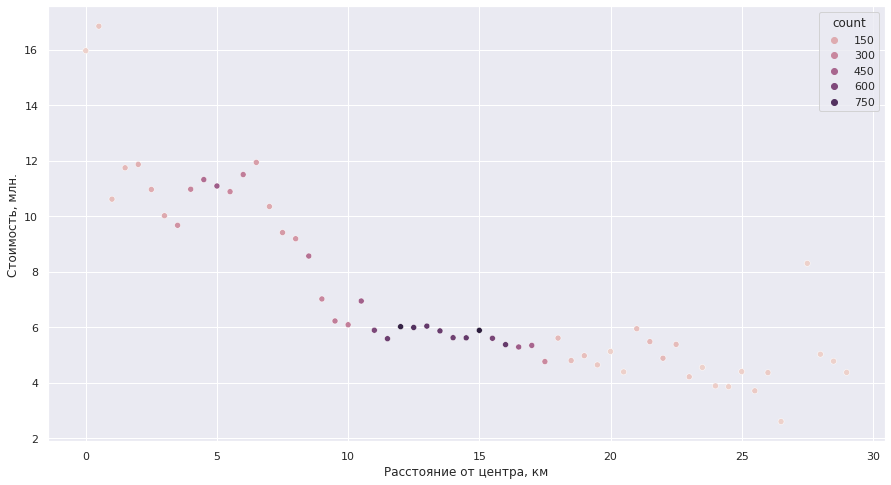

In [137]:
sns.set(rc={"figure.figsize":(15,8)})
sns.scatterplot(
    data=data_spb[['mean','cityCenters_km_round','count']],
    x='cityCenters_km_round', y='mean', hue='count',hue_order = ['N', 'Y']
); plt.xlabel('Расстояние от центра, км'); plt.ylabel('Стоимость, млн.');

Видим, что большая часть объявлений по объектам на расстоянии 11-17 км от центра при стоимости ~5-6.1 млн рублей.

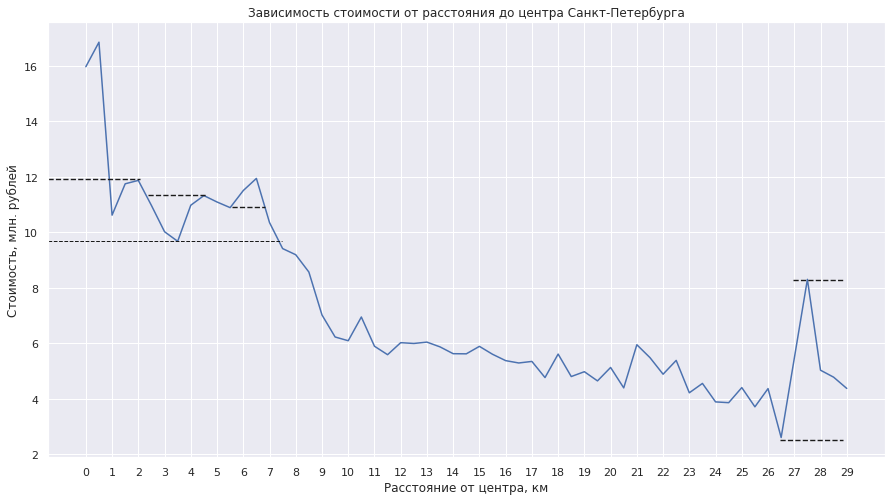

In [138]:
sp = sns.lineplot(
    data=data_spb[['mean','cityCenters_km_round']], x='cityCenters_km_round',y='mean')
tt = 'Зависимость стоимости от расстояния до центра Санкт-Петербурга';
sp.set_xticks(range(round(data_spb['cityCenters_km_round'].max()+1)))
plt.title(tt); plt.xlabel('Расстояние от центра, км'); plt.ylabel('Cтоимость, млн. рублей');
plt.axhline(y=11.9, xmin=0, xmax=0.11, color='k', linestyle='dashed', linewidth=1.4);
plt.axhline(y=11.35, xmin=0.12, xmax=0.19, color='k', linestyle='dashed', linewidth=1.4);
plt.axhline(y=10.9, xmin=0.22, xmax=0.26, color='k', linestyle='dashed', linewidth=1.4);
plt.axhline(y=9.7, xmin=0, xmax=0.28, color='k', linestyle='dashed', linewidth=1);
plt.axhline(y=2.5, xmin=0.875, xmax=.95, color='k', linestyle='dashed', linewidth=1.4);
plt.axhline(y=8.28, xmin=0.89, xmax=.95, color='k', linestyle='dashed', linewidth=1.4);
#plt.axline((0.01,),(0.03,11.35), color='k', linestyle='dashed', linewidth=1);

**Как мы видим:**
- есть зависимость по расстоянию от центра города: чем дальше тем дешевле;
- стоимость объектов на расстоянии до двух километров до центра в 3-4 раза превышает стоимость объектов на расстоянии >9 километров от центра;
- наблюдается провал в стоимости на расстоянии 2.2 - 4.5 км от центра;
- наблюдается подъем в стоимости на расстоянии 5.5 - 6.5 км от центра;
- наблюдается большой рост в стоимости на расстоянии 26.5 - 27.5 км от центра со спадом к 29.5км, вероятно это ближайшие пригороды с развитой инфраструктурой;

In [139]:
d2045 = data[data['locality_name'] == 'Санкт-Петербург'].query('2 <= cityCenters_km_round <=4.5 ')
display(
    d2045.groupby(['cityCenters_km_round'])[['total_area','living_area','rooms','floors_total','floor','parks_around3000']]
    .agg(['count', 'mean']).style.format("{:,.1f}")
)
d5070 = data[data['locality_name'] == 'Санкт-Петербург'].query('5 <= cityCenters_km_round <=7 ')
display(
    d5070.groupby(['cityCenters_km_round'])[['total_area','living_area','rooms','floors_total','floor','parks_around3000']]
    .agg(['count', 'mean']).style.format("{:,.1f}")
)

Вероятнее всего спад на расстоянии 2.2 - 4.5 км от центра связан с тем, что от центра дальше, а "условия" (старые малоэтажные одниаковые по средней площади здания) - не меняются. Так же мы видим, что кол-во объектов с 2 по 4км растет, т.е. еще и плотность застройки увеличивается, а квартиры, грубо говоря такие же.<br/>

Рост цен на 5.5 - 6.8 км возможно вызван невозможностью уплотнять строительство, новым районам, инфраструктуре, - поэтому при тех же в среднем параметрах объекты стоят дороже. 

А на окраинах города и в ближайших пригородах фактически уже существуют огромные спальные микрорайоны и небольшой подъем цен там мог быть связан с развитием инфраструктуры в этих районах (строительством метро, дорог, новых транспортных маршрутов, различных ТЦ и соц.учреждений).

Однозначно то, что близость к центру до 8 километров значительно влияет на стоимость объекта недвижимости в большую сторону.

## Общий вывод

**Мы исследовали данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет.**

По каждому объекту недвижимости было доступно два вида данных: вписанные пользователями (высота полотков и т.п.), и полученные автоматически на основе картографических данных (расстояние до центра, аэропорта и т.д.).

**Мы произвели предобработку данных, заполнили пропуски, избавились от неявных дубликатов в названиях локаций, обработали аномальные значения.**

Произвели исследовательский анализ данных, - общей площади, жилой площади, площади кухни, стоимости объектов, количества комнат, высоты потолков, этажа на котором расположен объект, типа этажа (первый, последний, другой), общего кол-ва этажей, расстояний до центра города, ближайшего парка, пруда и их кол-ва.

**Мы произвели анализ факторов, которые могут влиять на стоимость объекта недвижимости, и выявили следующее:**

1. В среднем объявление о продаже размещается в течение 180 дней. Быстрыми продажами можно называть срок до 1.5 месяцев, а необычайно долгими срок от 7,5 месяцев.
2. С 2014 года количество объявлений увеличивается, а среднее время публикации уменьшается (с 912 дней в 2014 до 31 дня в 2019).
3. Стоимость объектов линейно зависит (корр.77%) от общей площади помещения (в основном до 100 м.кв.).
4. Стоимость объектов линейно зависит (корр.66%) от жилой площади помещения.
5. Стоимость объектов зависит от площади кухни (корр.59%), в основном до 18-20м.кв.
6. Стоимость объектов линейно зависит от количества комнат, - с увеличением кол-ва комнат увеличивается и стоимость помещения.
7. Квартиры на первых этажах в среднем стоят дешевле всего, на последних дороже, но самые дорогие объекты недвижимости в основном располагаются не на 1 или последнем этаже.
8. Стоимость объектов недвижимости не имеет связи с днем или месяцев публикации объявления.
9. Наибольшая средняя стоимость недвижимости была в 2014 году; с 2015 (довольно стремительно) до 2019 (меньше) средняя стоимость падает; в 2019 году заметен небольшой рост средней стоимости объекта.

**Мы посчитали самый дорогой и дешевый квадратный метр недвижимости в ТОП-10 по количеству объявлений.**<br/>
Самый дорогой средний квадратный метр - в Санкт-Петербурге - (112 080 рублей за м²).<br/>
А самый дешевый средний квадратный метр - в Выборге - (58 141 рублей за м²).

**Мы выявили два основых параметра определения рыночной стоимости объектов недвижимости:**

**1.** На стоимость объекта сильно влияет размер общей площади и жилой площади. Чем больше площадь, - тем дороже.<br/>При площадях от 100 м² эта зависимость становится менее выраженной и начинют больше влияють другие параметры.<br/>

**2.** Решающий фактор непосредственно влияющий на стоимость - расстояние до центра города.<br/>Самые дорогие объекты до 2-3 км от центра (превышают в 2-4 раза стоимость объектов далее 8-9 км от центра),<br/>второй по дороговизне ценовой сегмент расположен на расстоянии между 6 и 7 м от центра.